In [ ]:
import pandas as pd


df = pd.read_csv("data/labeling_in_progress_2023_12_28_13_20.csv")

## Отрисовка сегментирования с тремя видами регрессии

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ruptures as rpt
from pydantic import BaseModel


class Config(BaseModel):
    model_type: str = "pelt"  # pelt or binseq
    model_compute_error_type: str = "l1"
    min_size: int = 3
    penalty: float = 0.4


def segment_with_regressions(ts_i, norm_prices, config: Config):
    if config.model_type == "pelt":
        algo = rpt.Pelt(model=config.model_compute_error_type, min_size=config.min_size, jump=1).fit(norm_prices)
    elif config.model_type == "binseq":
        algo = rpt.Pelt(model=config.model_compute_error_type, min_size=config.min_size, jump=1).fit(norm_prices)
    else:
        raise rpt.exceptions.InvalidModelError("Не смог распознать тип модели")
    
    result = algo.predict(pen=config.penalty)

    plt.figure(figsize=(18, 8))  # Увеличение размера графика

    # Чередуем цвета фона для сегментов
    colors = ['lightblue', 'lightpink']
    for index, (start, end) in enumerate(zip([0] + result[:-1], result)):
        plt.fill_betweenx(y=[min(norm_prices), max(norm_prices)], x1=start, x2=end, color=colors[index % 2], alpha=0.3)

    # Рисуем исходный временной ряд с точками
    plt.plot(norm_prices, color='blue', marker='o')  # Голубой цвет линии с точками
    # Чередуем цвета фона для сегментов
    colors = ['lightblue', 'lightpink']
    for index, (start, end) in enumerate(zip([0] + result[:-1], result)):
        plt.fill_between(np.arange(start, end), norm_prices[start:end], color=colors[index % 2], alpha=0.2)

    # Рисуем регрессии для каждого сегмента
    for (start, end) in zip([0] + result[:-1], result):
        segment = norm_prices[start:end]
        x = np.arange(start, end)

        # Linear regression
        if len(segment) > 1: 
            reg = LinearRegression().fit(x.reshape(-1, 1), segment)
            plt.plot(x, reg.predict(x.reshape(-1, 1)), color="orange", label='Линейная регрессия')

        # Poly 2
        if len(segment) > 3:  # Убедитесь, что для полинома 3-ей степени есть достаточно точек
            coefs = np.polyfit(x - start, segment, deg=2)
            poly = np.poly1d(coefs)
            plt.plot(x, poly(x - start), color="green")

        # Poly 3
        if len(segment) > 3:  # Убедитесь, что для полинома 3-ей степени есть достаточно точек
            coefs = np.polyfit(x - start, segment, deg=3)
            poly = np.poly1d(coefs)
            plt.plot(x, poly(x - start), color="purple", label='Полином 3-й степени')


    # Добавляем текст в углу
    plt.text(0.05, 0.98, 'Линейная регрессия', color='orange', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.text(0.19, 0.98, 'Полином 2-й степени', color='green', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.text(0.33, 0.98, 'Полином 3-й степени', color='purple', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

    plt.title(f"{ts_i} -- 1st -- config: {config}")


    plt.show()


/Users/dr1m/.local/share/virtualenvs/segmentation_tools-IVSsuVC5/lib/python3.10/site-packages/pydantic/_internal/_fields.py:149: UserWarning: Field "model_type" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/Users/dr1m/.local/share/virtualenvs/segmentation_tools-IVSsuVC5/lib/python3.10/site-packages/pydantic/_internal/_fields.py:149: UserWarning: Field "model_compute_error_type" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [ ]:
amount_of_plots = 20

for i in range(amount_of_plots):
    norm_prices = np.array([df.at[i, f'norm_price_{j + 1}'] for j in range(25)])
    buy_sell_labels = [df.at[i, f'sep_point_{j + 1}'] for j in range(25)]



## Отрисовка сегментирования с тремя видами регрессии, где стартовая точка для каждой - среднее первых двух цен

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ruptures as rpt
from pydantic import BaseModel


class Config(BaseModel):
    model_type: str = "pelt"  # pelt or binseq
    model_compute_error_type: str = "l1"
    min_size: int = 3
    penalty: float = 0.4


def segment_timeseries_with_regressions_started_and_ended_from_mean_of_two(ts_i, norm_prices, config: Config):
    if config.model_type == "pelt":
        algo = rpt.Pelt(model=config.model_compute_error_type, min_size=config.min_size, jump=1).fit(norm_prices)
    elif config.model_type == "binseq":
        algo = rpt.Pelt(model=config.model_compute_error_type, min_size=config.min_size, jump=1).fit(norm_prices)
    else:
        raise rpt.exceptions.InvalidModelError("Не смог распознать тип модели")
    
    result = algo.predict(pen=config.penalty)

    plt.figure(figsize=(18, 8))

    # Чередуем цвета фона для сегментов
    colors = ['lightblue', 'lightpink']
    for index, (start, end) in enumerate(zip([0] + result[:-1], result)):
        plt.fill_between(np.arange(start, end), norm_prices[start:end], color=colors[index % 2], alpha=0.2)

    # Рисуем исходный временной ряд с точками
    plt.plot(norm_prices, color='blue', marker='o')

    # Рисуем регрессии для каждого сегмента
    for (start, end) in zip([0] + result[:-1], result):
        segment = norm_prices[start:end]
        x = np.arange(start, end)

        # Изменение для регрессий
        if len(segment) > 2:
            start_point = np.mean(segment[:2])
            end_point = np.mean(segment[-2:])
            modified_segment = np.concatenate([[start_point, start_point], segment[2:-2], [end_point, end_point]])
            modified_x = np.arange(start, start + len(modified_segment))

            # Линейная регрессия
            reg = LinearRegression().fit(modified_x.reshape(-1, 1), modified_segment)
            plt.plot(modified_x, reg.predict(modified_x.reshape(-1, 1)), color="orange", label='Линейная регрессия')

            # Полиномиальная регрессия 2-й и 3-й степени
            if len(segment) > 4:
                # Полином 2-й степени
                coefs = np.polyfit(modified_x - start, modified_segment, deg=2)
                poly = np.poly1d(coefs)
                plt.plot(modified_x, poly(modified_x - start), color="green")

                # Полином 3-й степени
                coefs = np.polyfit(modified_x - start, modified_segment, deg=3)
                poly = np.poly1d(coefs)
                plt.plot(modified_x, poly(modified_x - start), color="purple")

    # Добавляем текст в углу
    plt.text(0.05, 0.98, 'Линейная регрессия', color='orange', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.text(0.19, 0.98, 'Полином 2-й степени', color='green', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.text(0.33, 0.98, 'Полином 3-й степени', color='purple', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

    plt.title(f"{ts_i} -- 2nd -- config: {config}")
    plt.show()

## Тест двух моделей

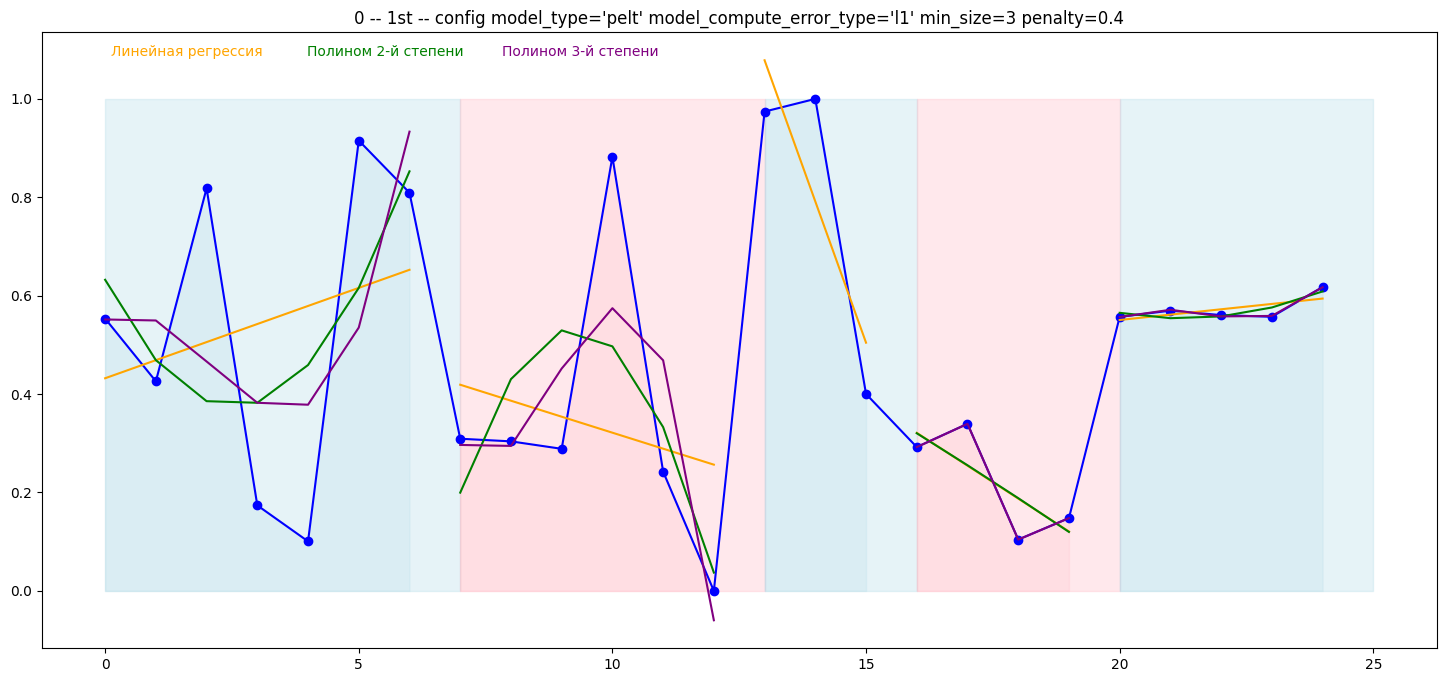

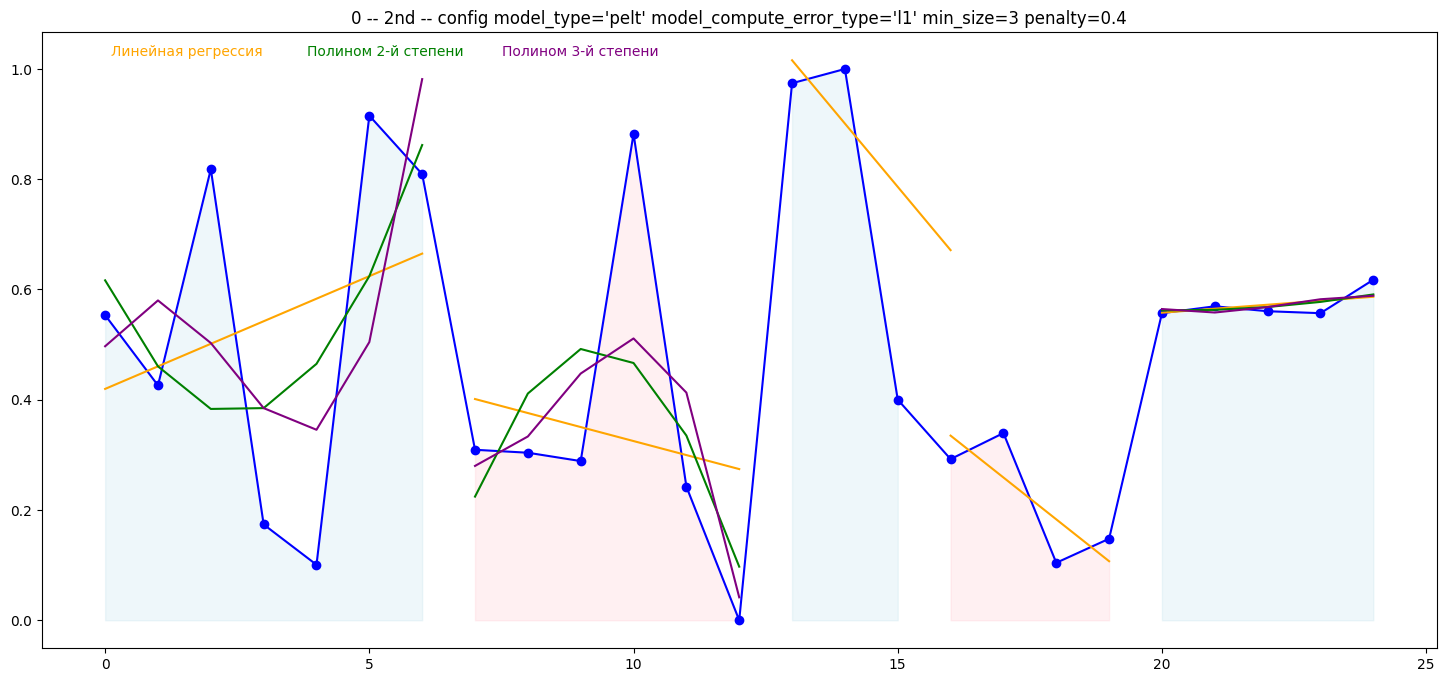

------------------------------


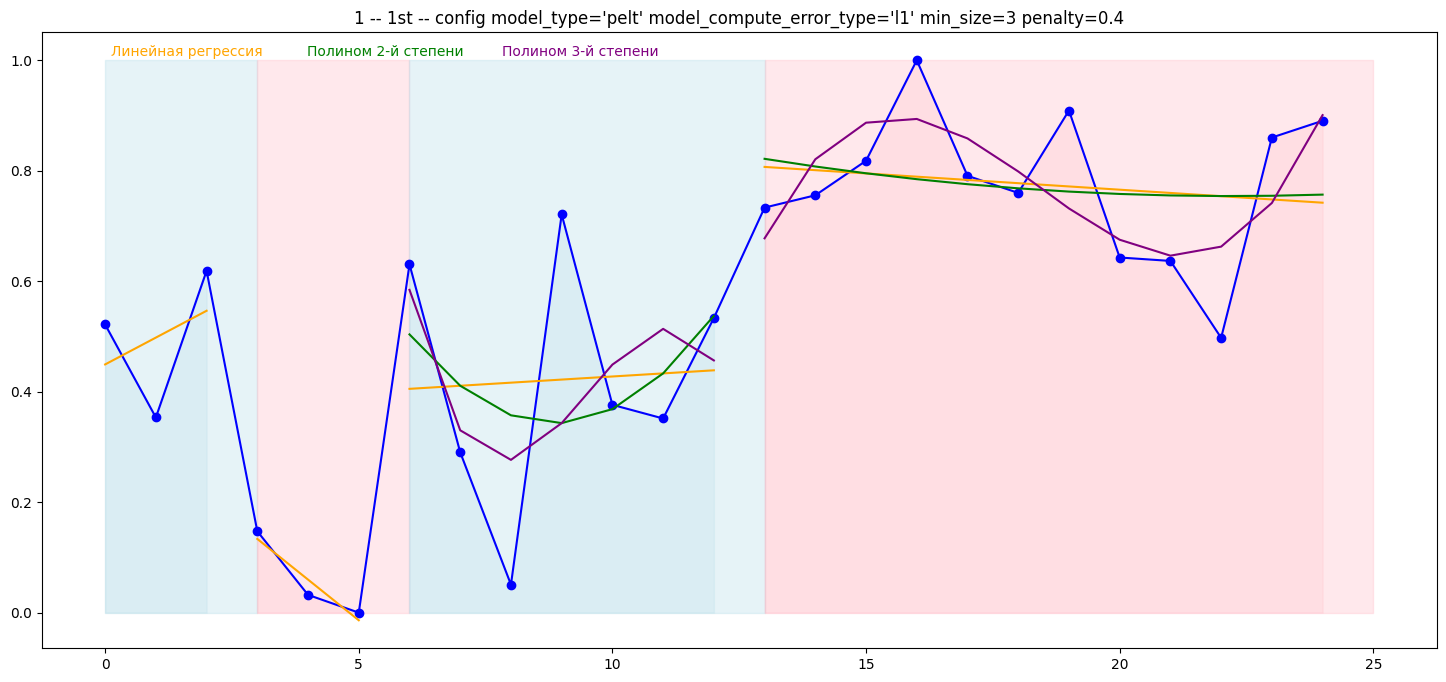

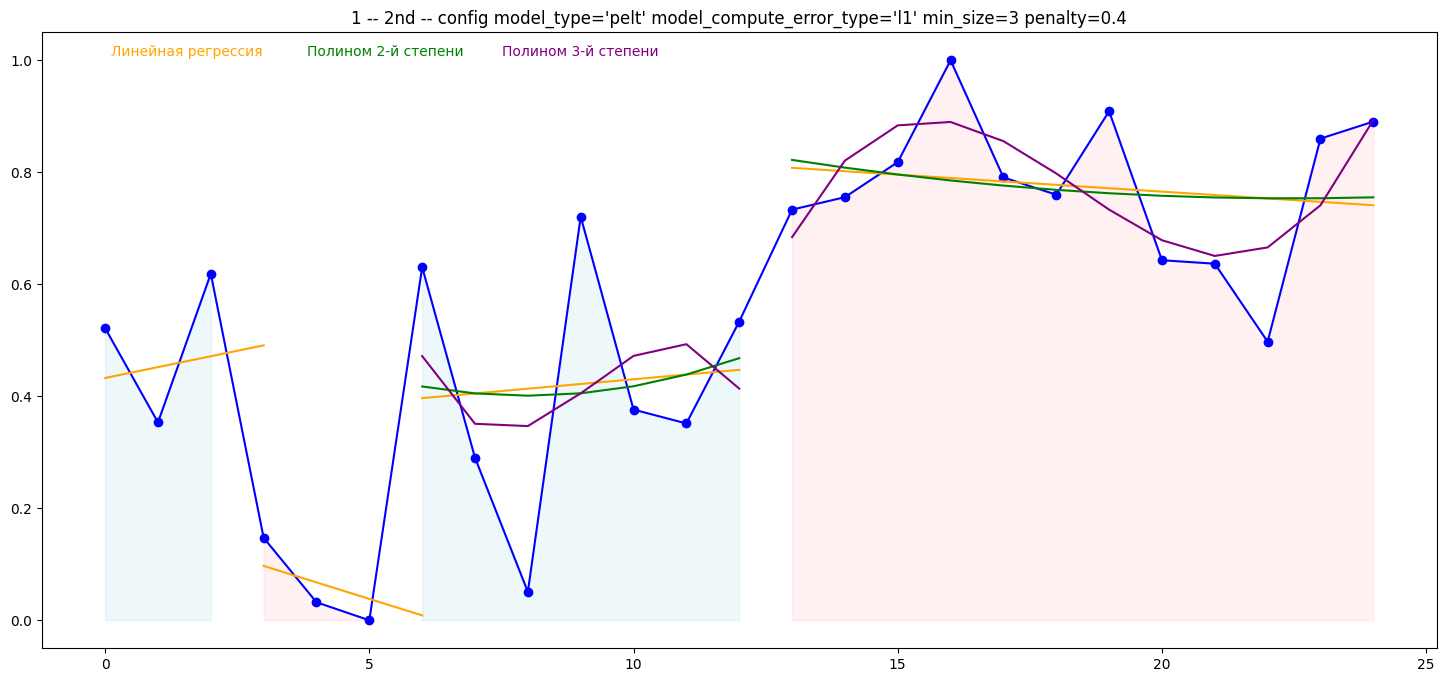

------------------------------


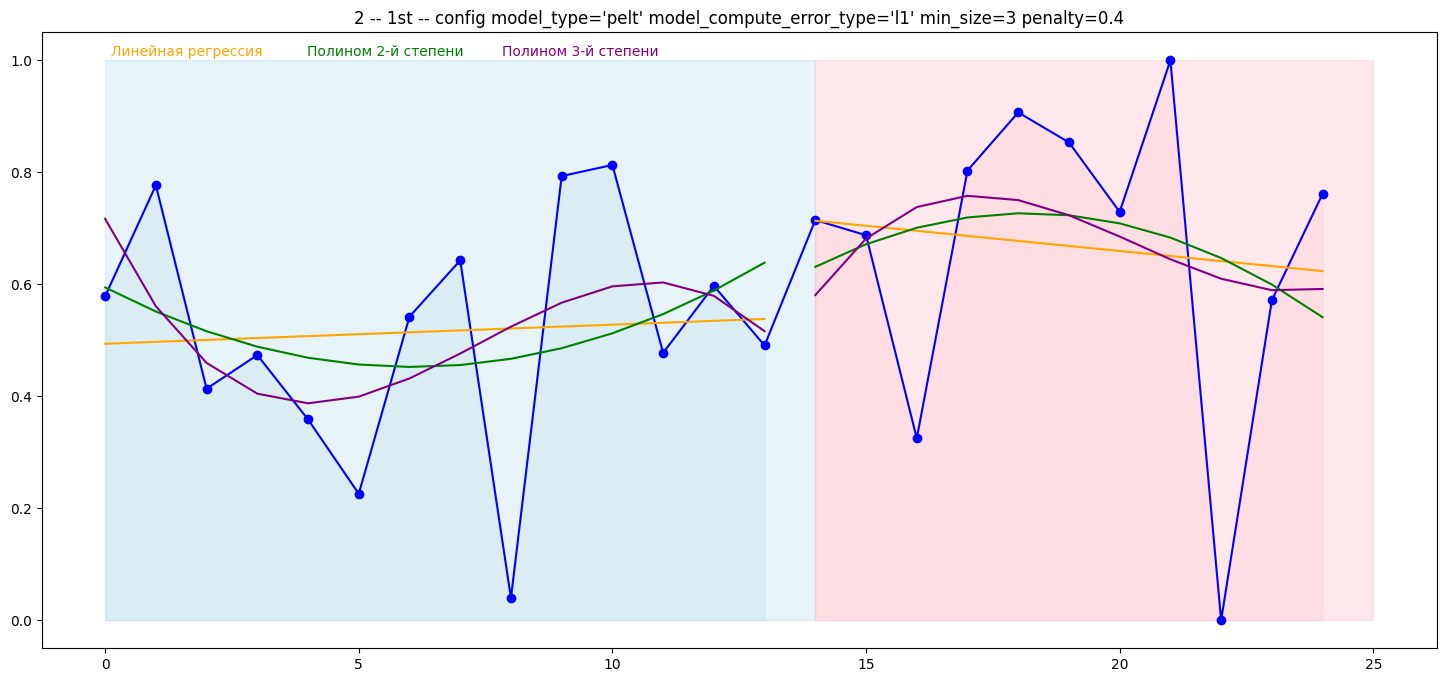

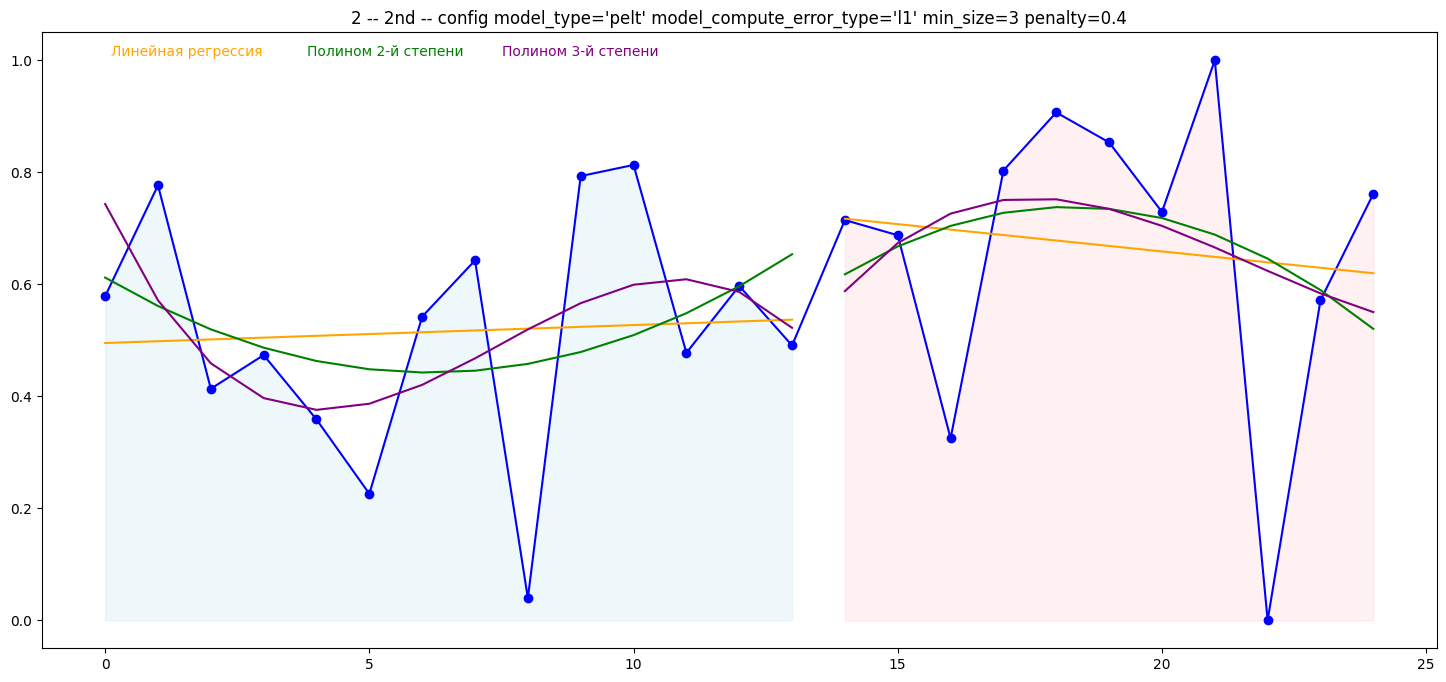

------------------------------


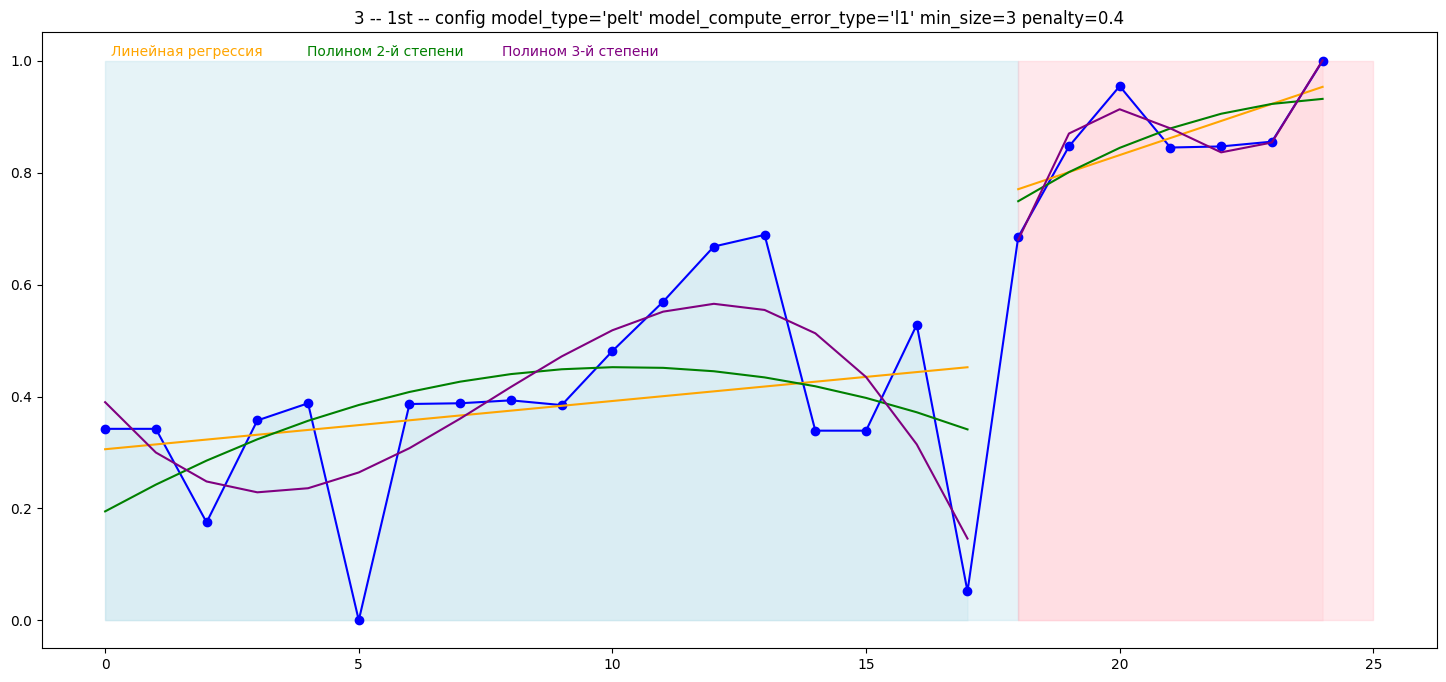

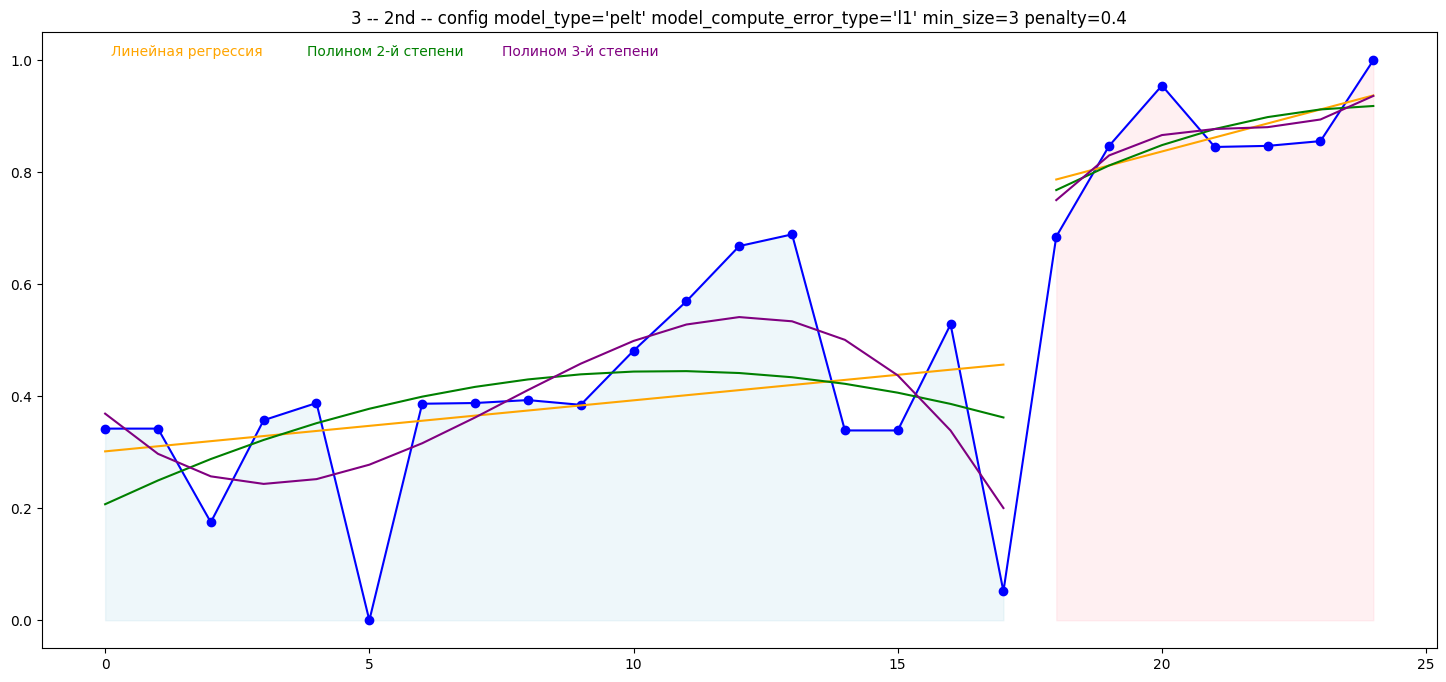

------------------------------


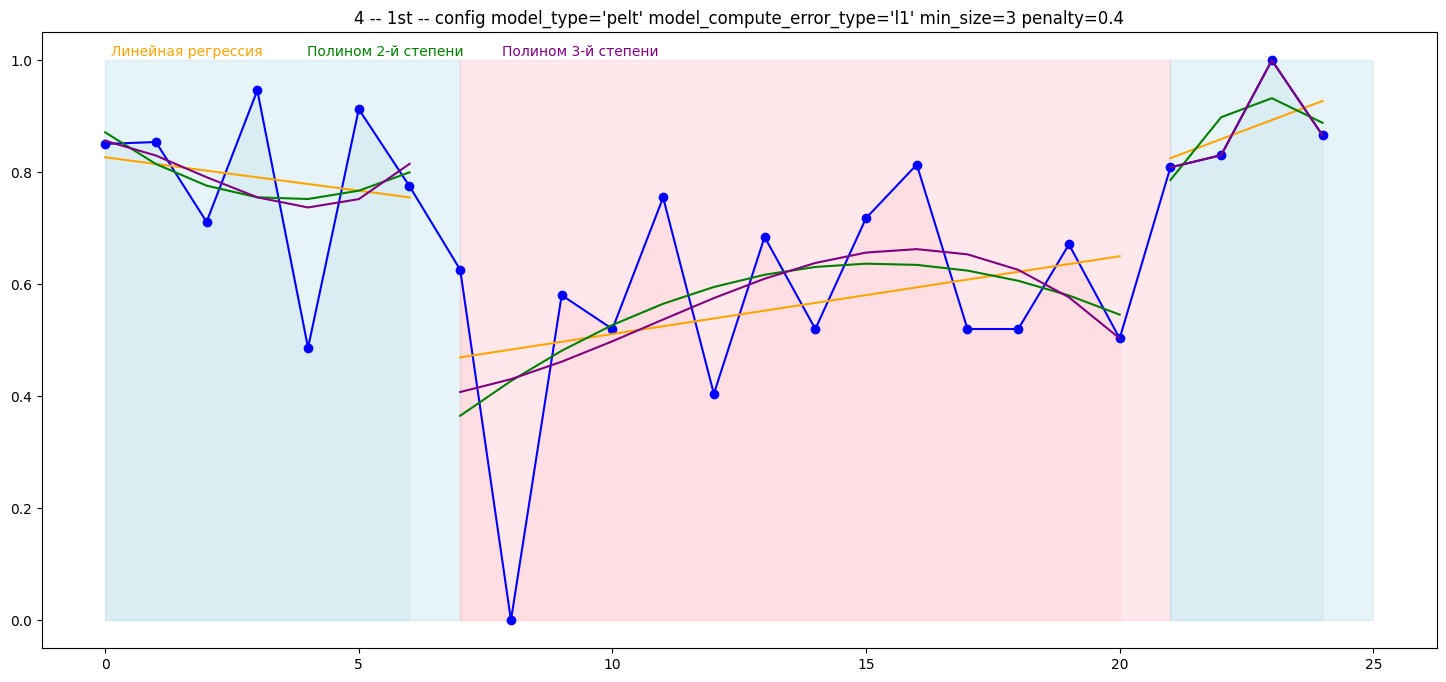

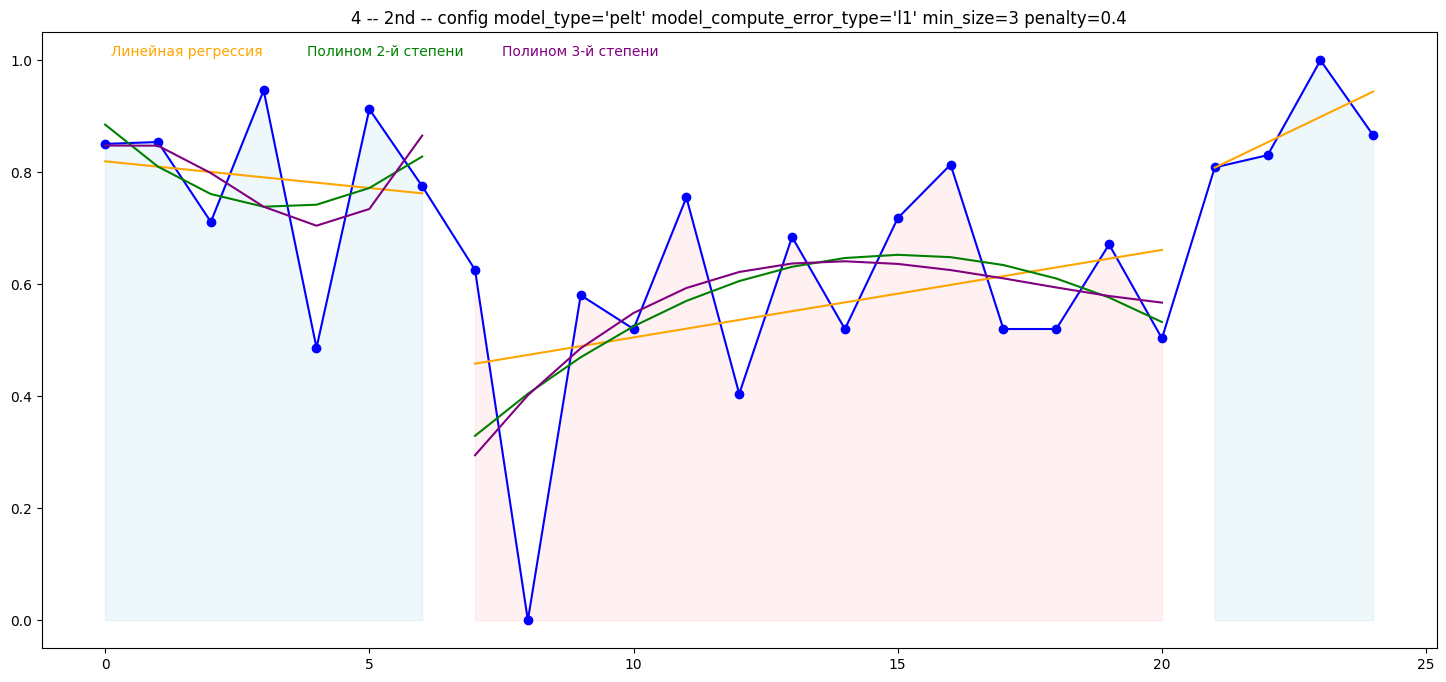

------------------------------


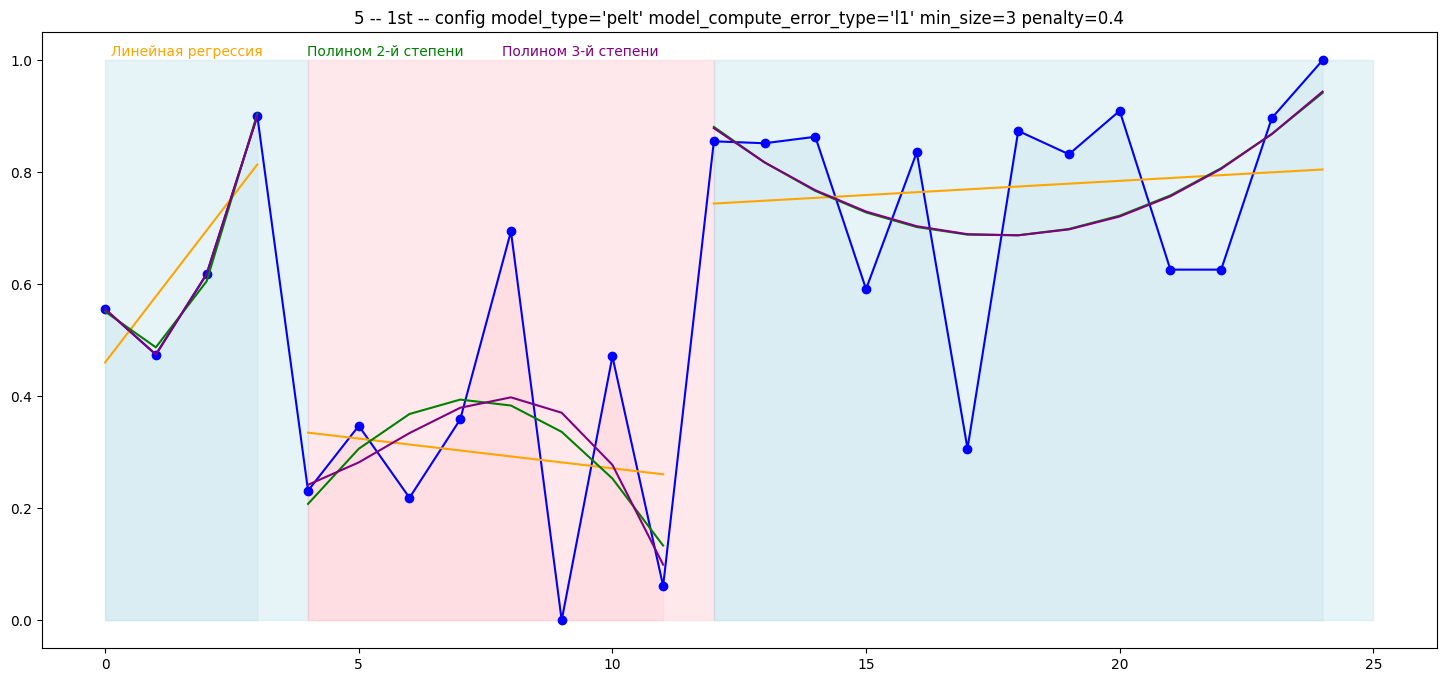

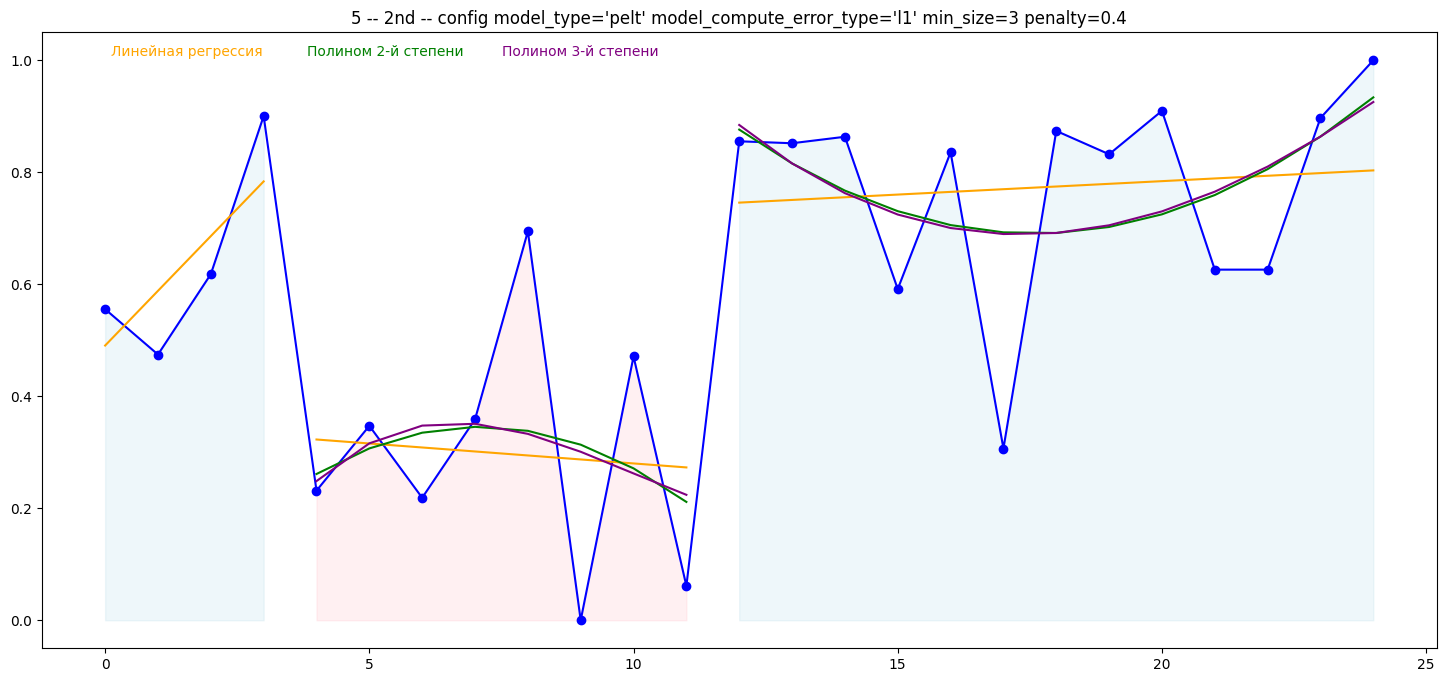

------------------------------


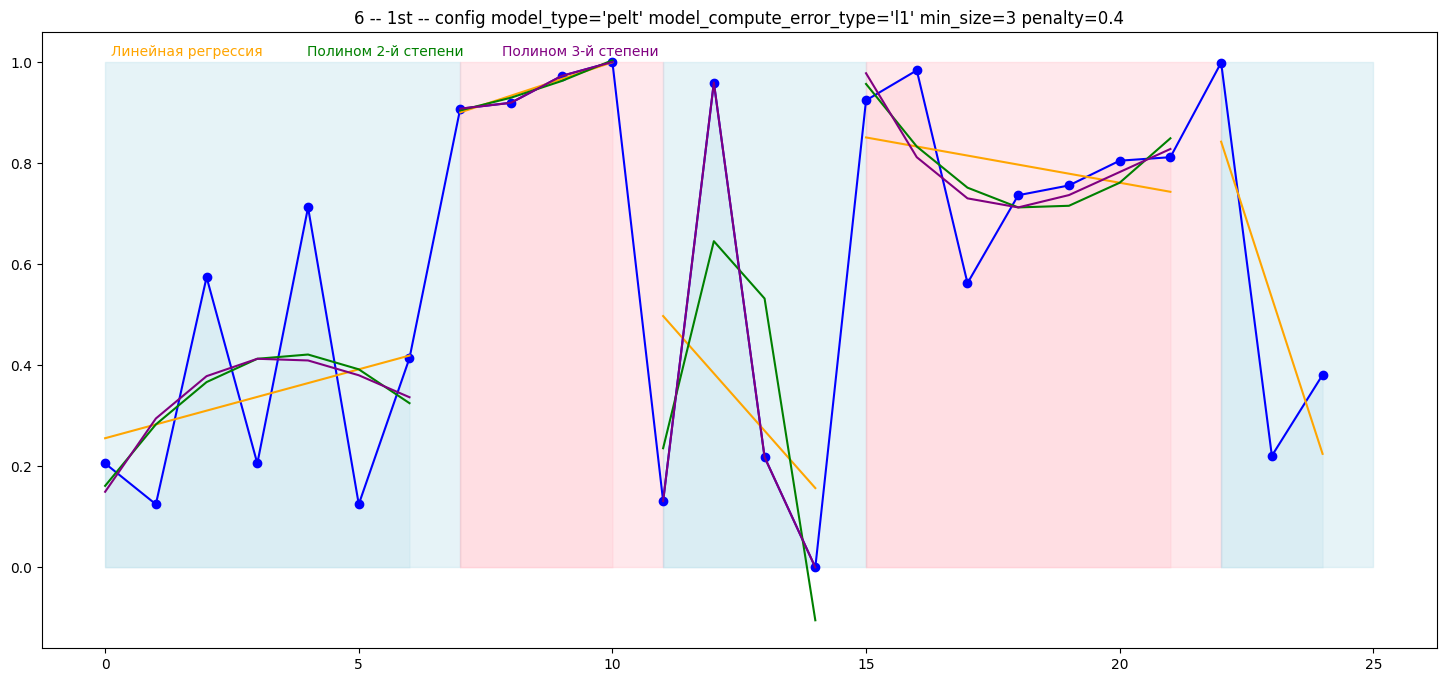

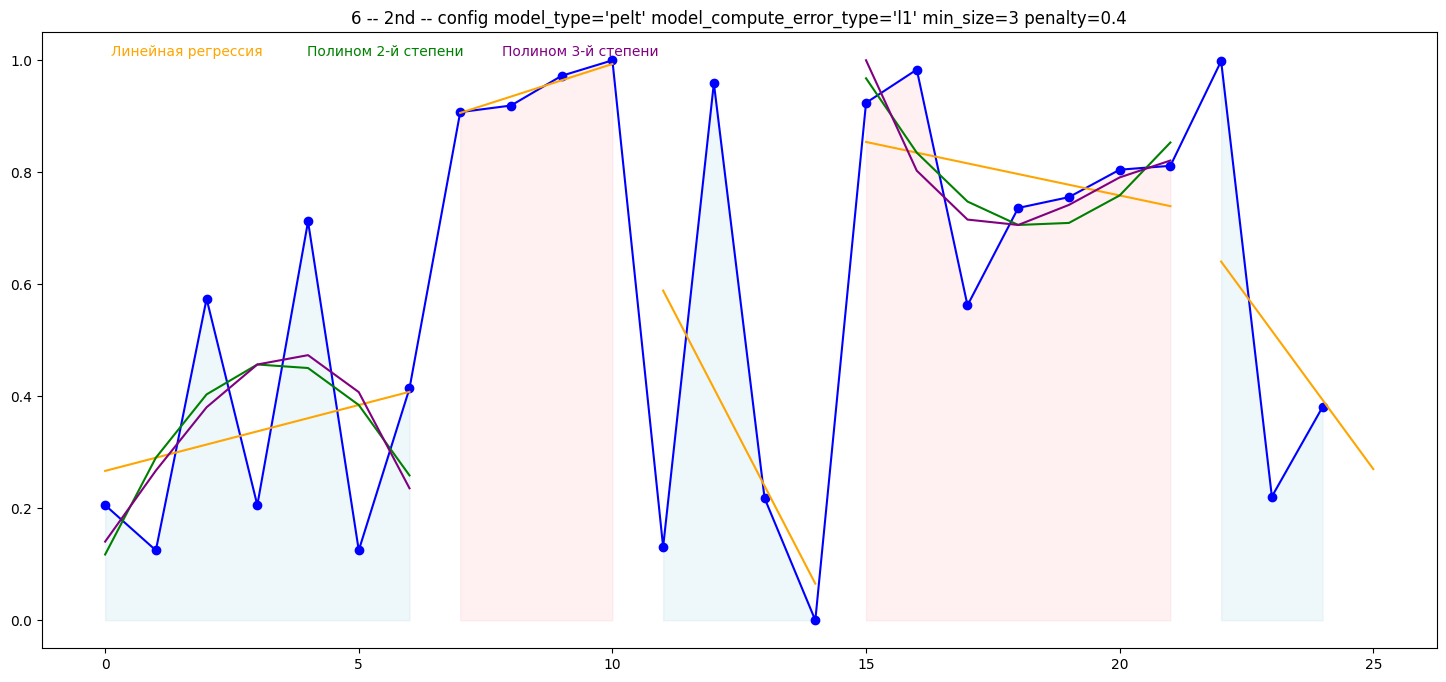

------------------------------


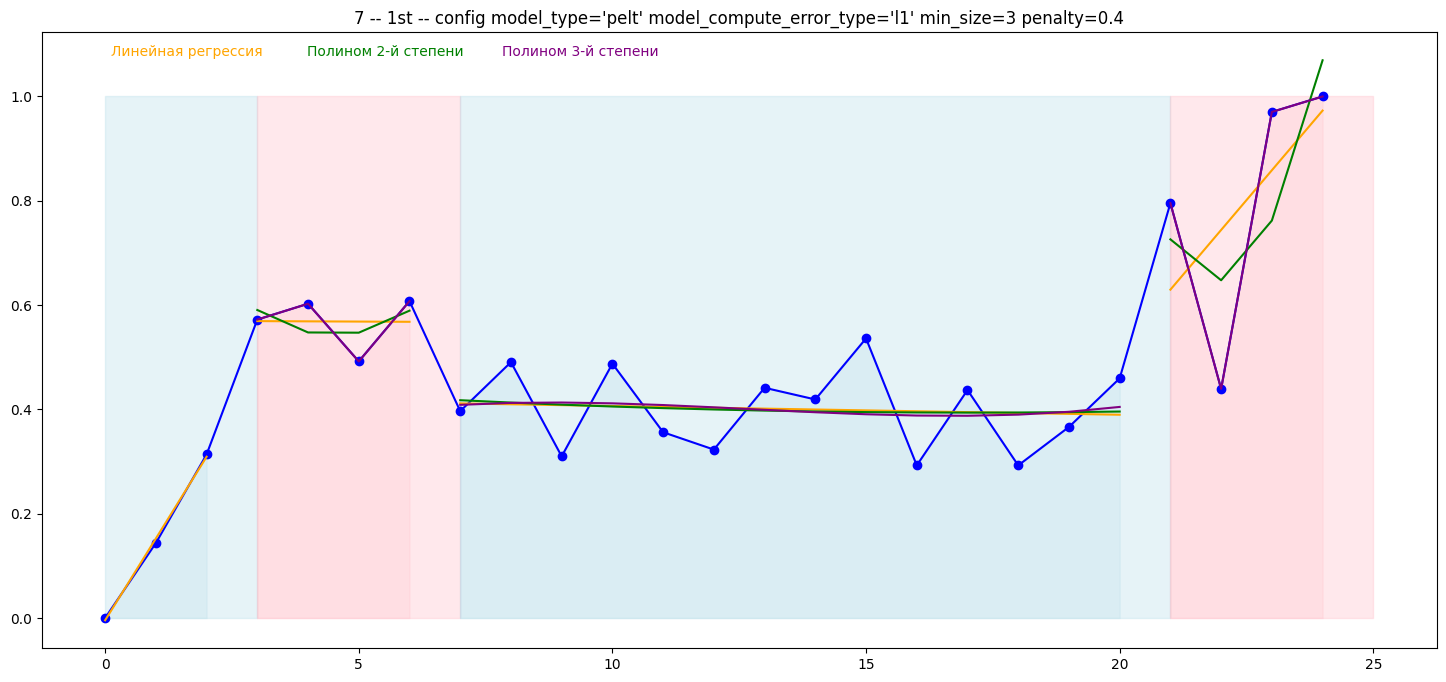

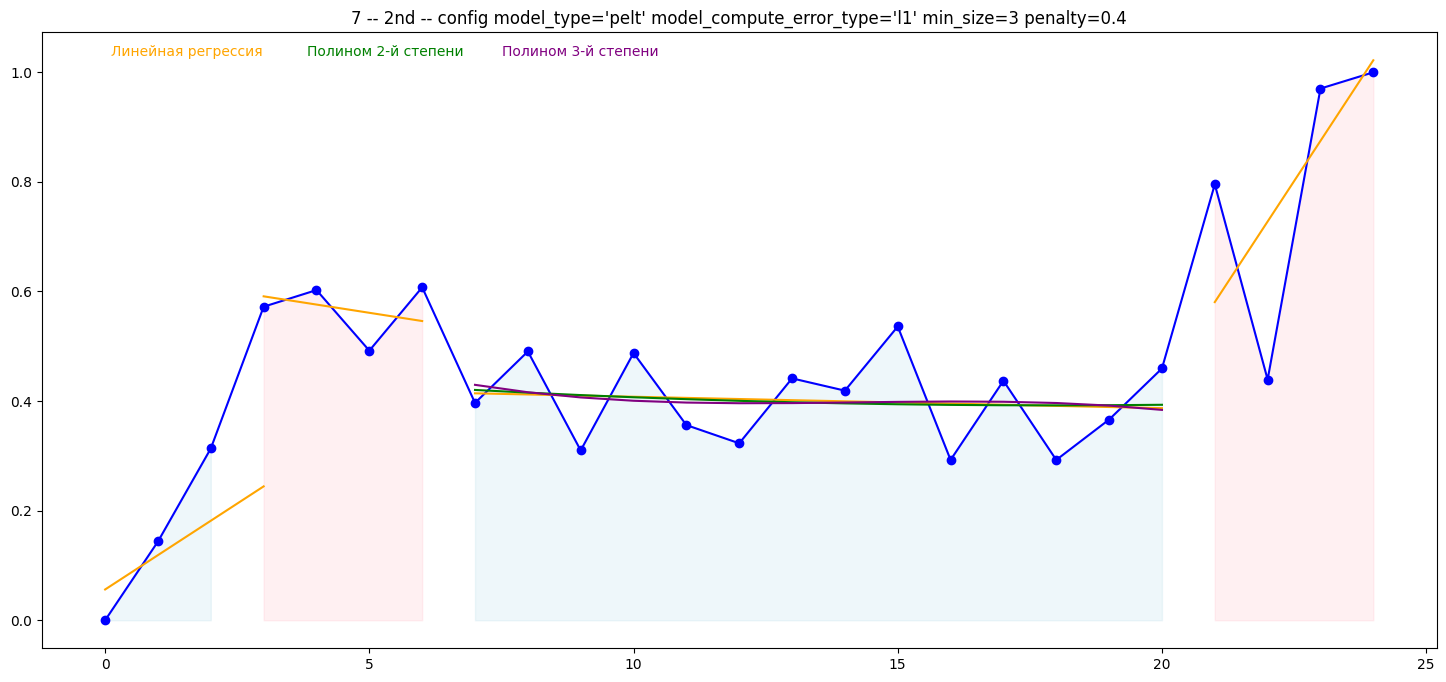

------------------------------


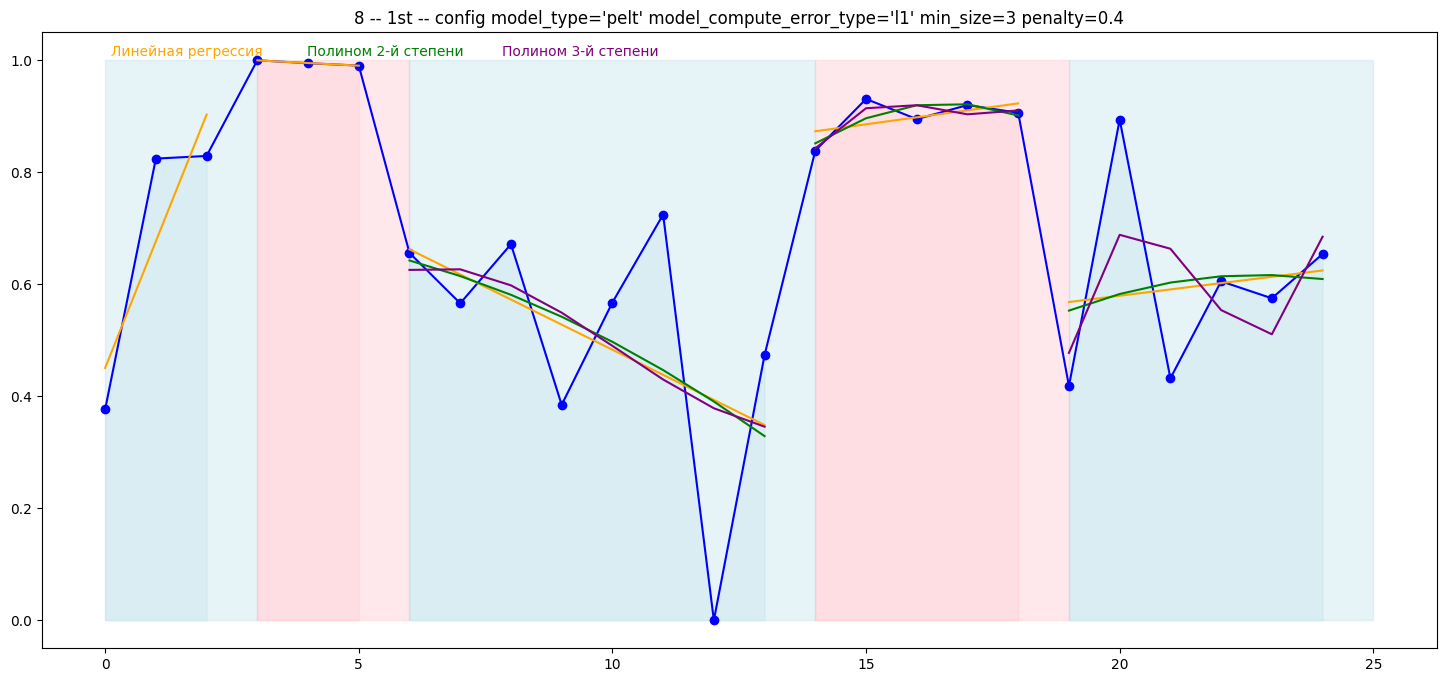

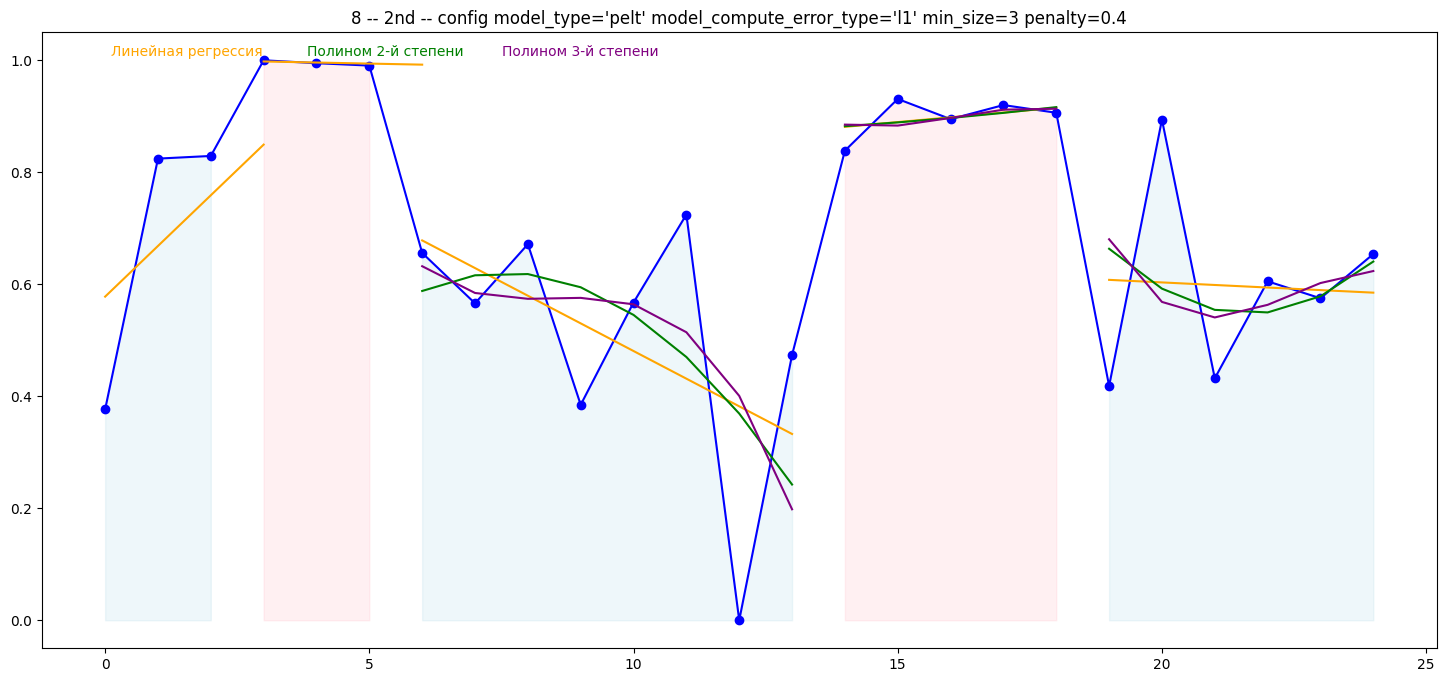

------------------------------


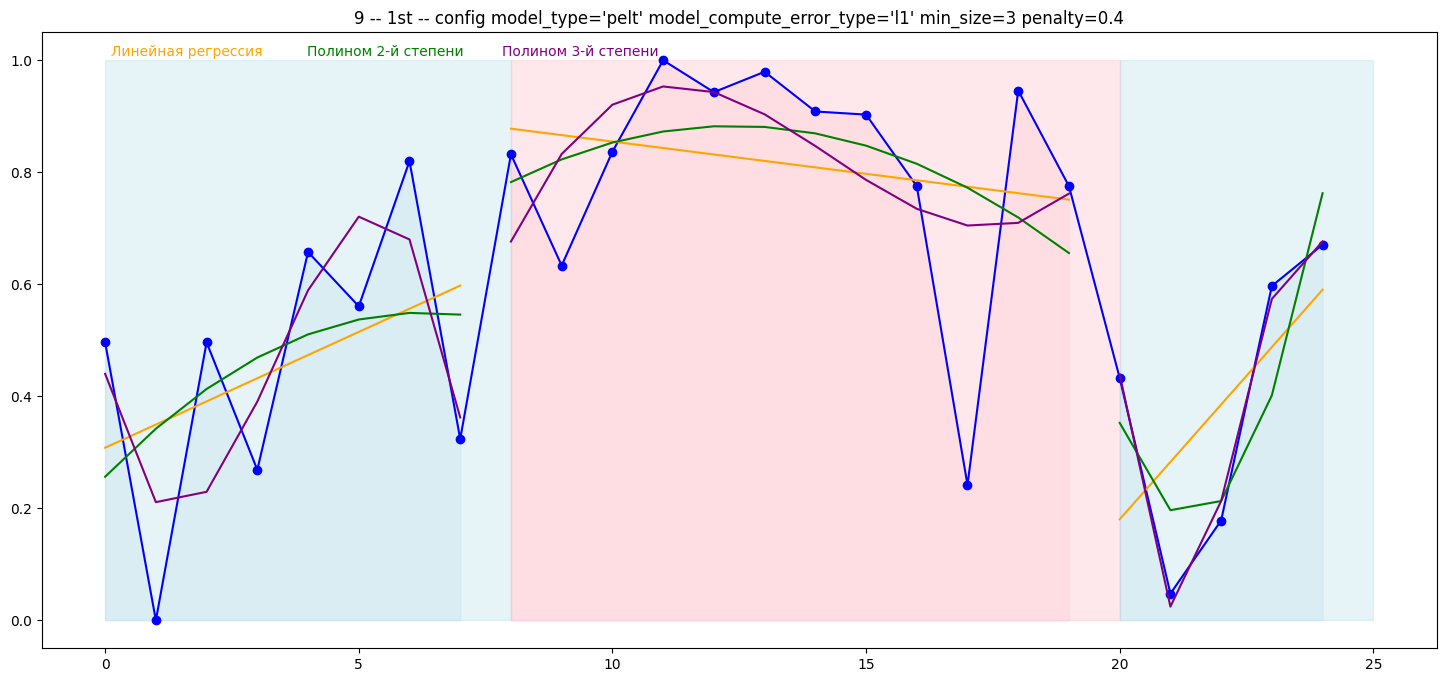

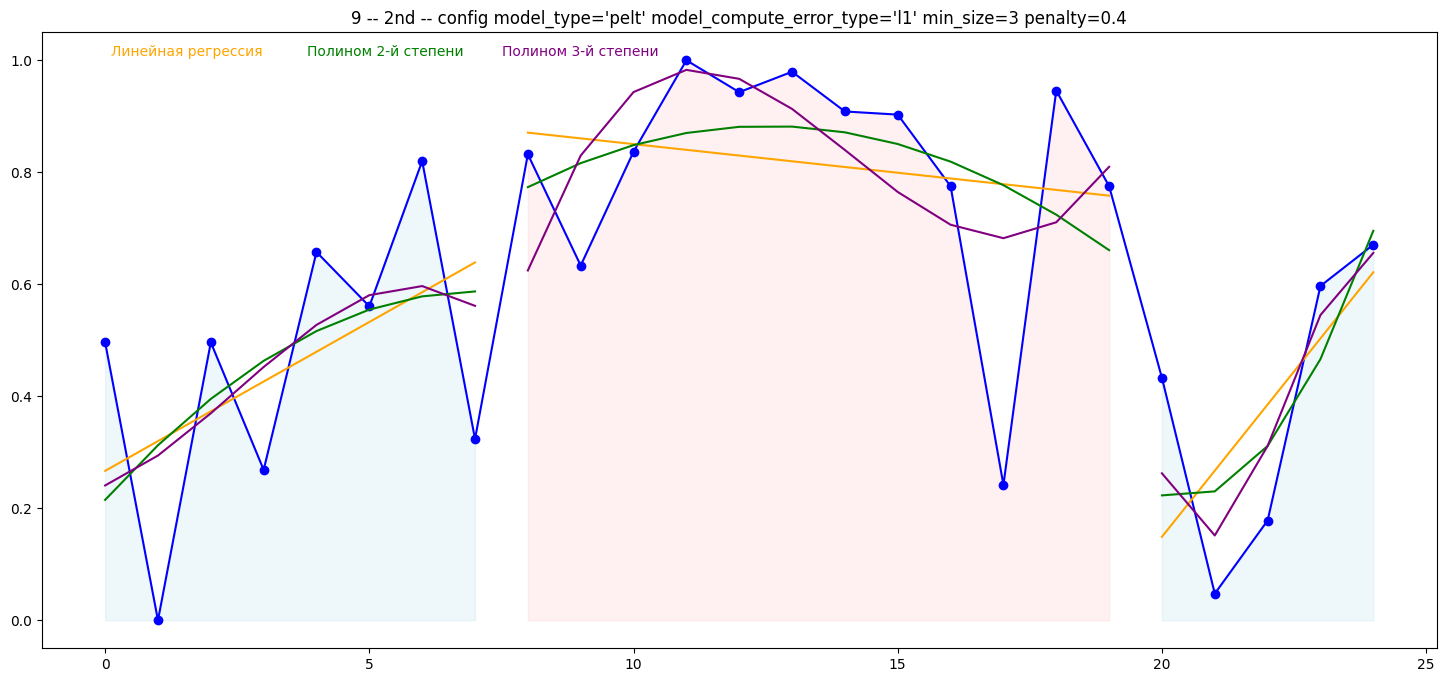

------------------------------


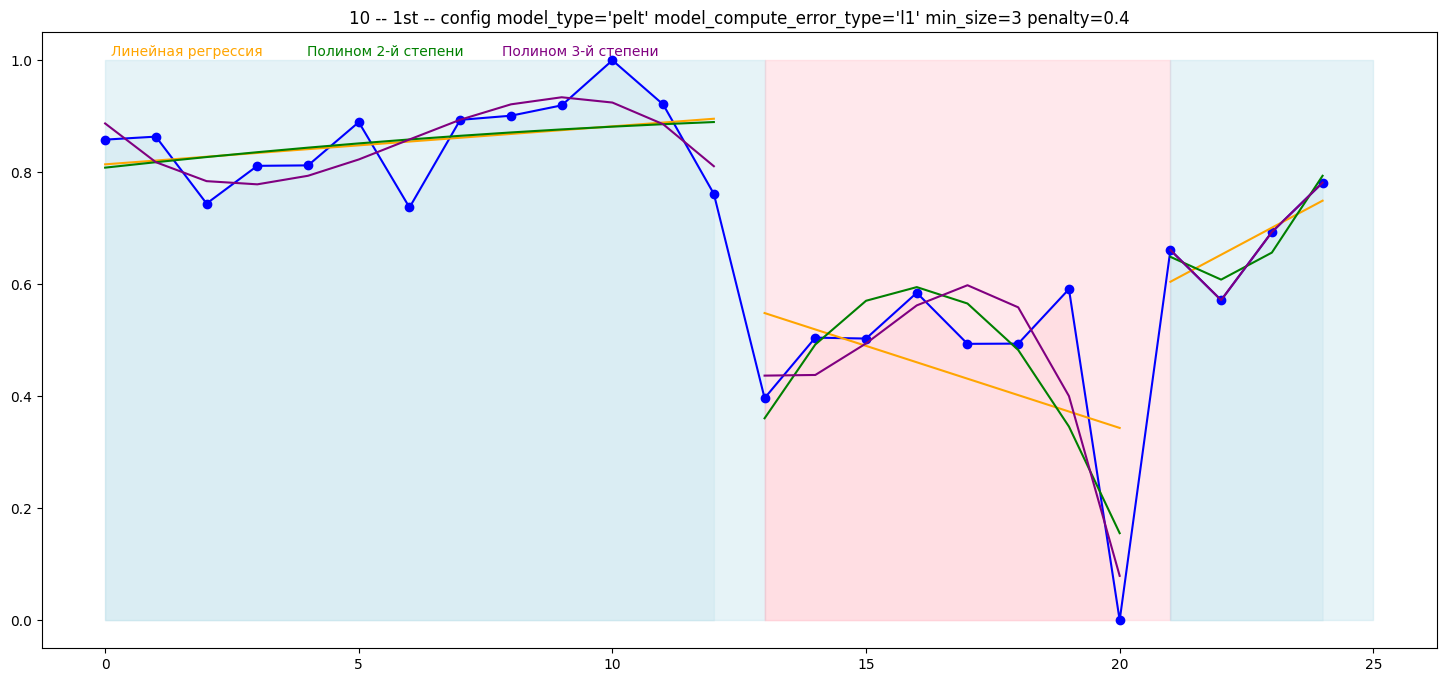

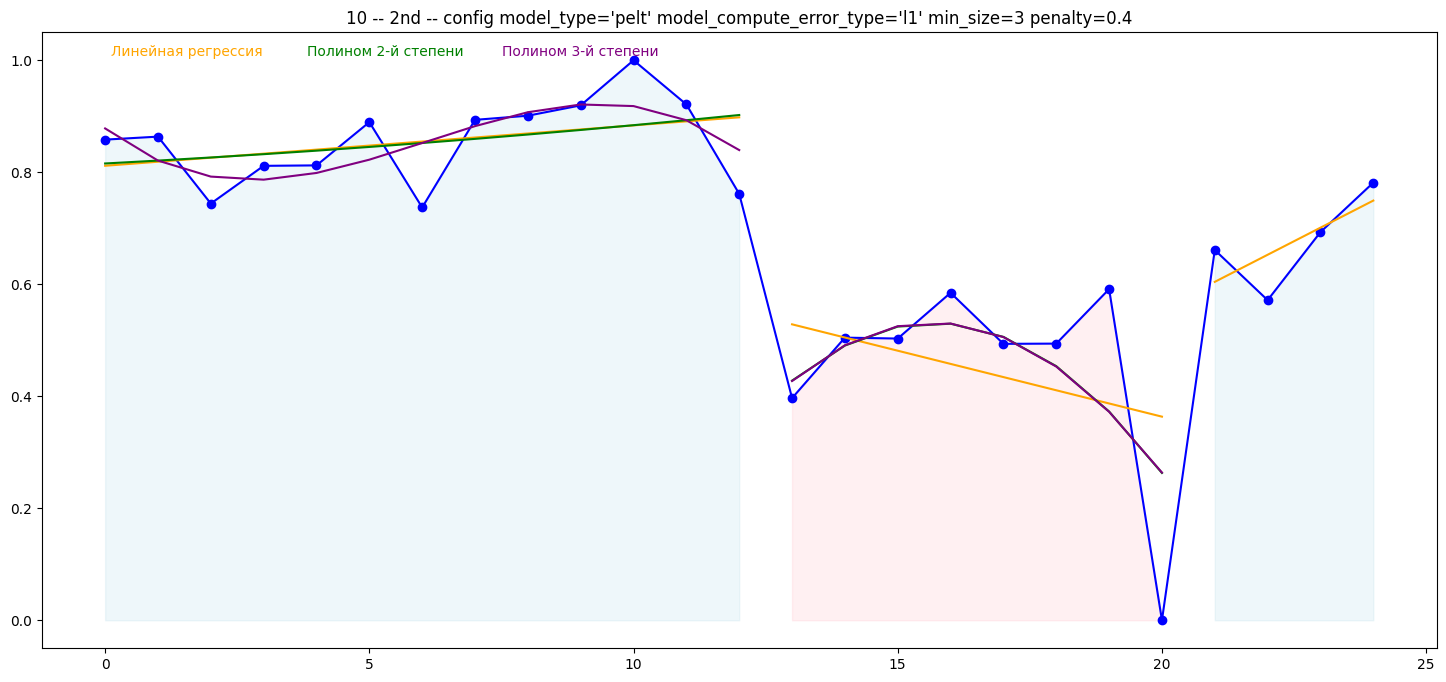

------------------------------


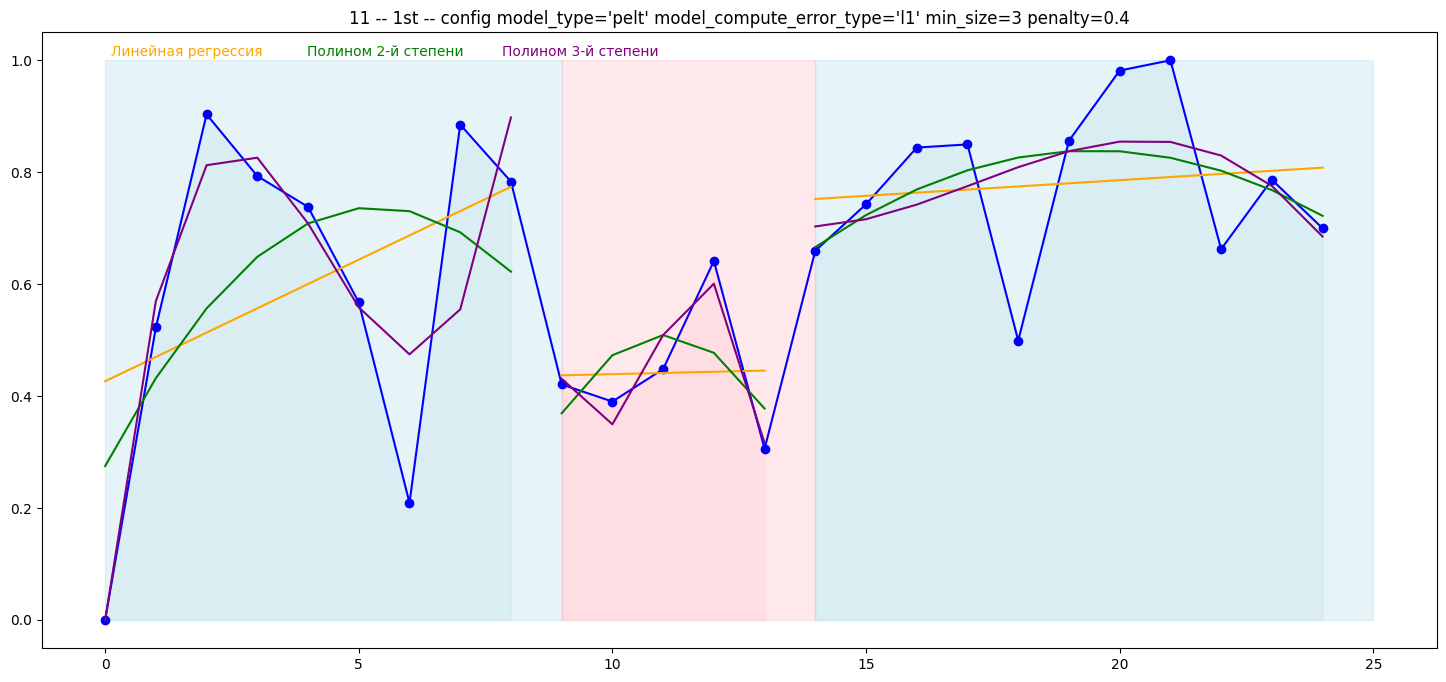

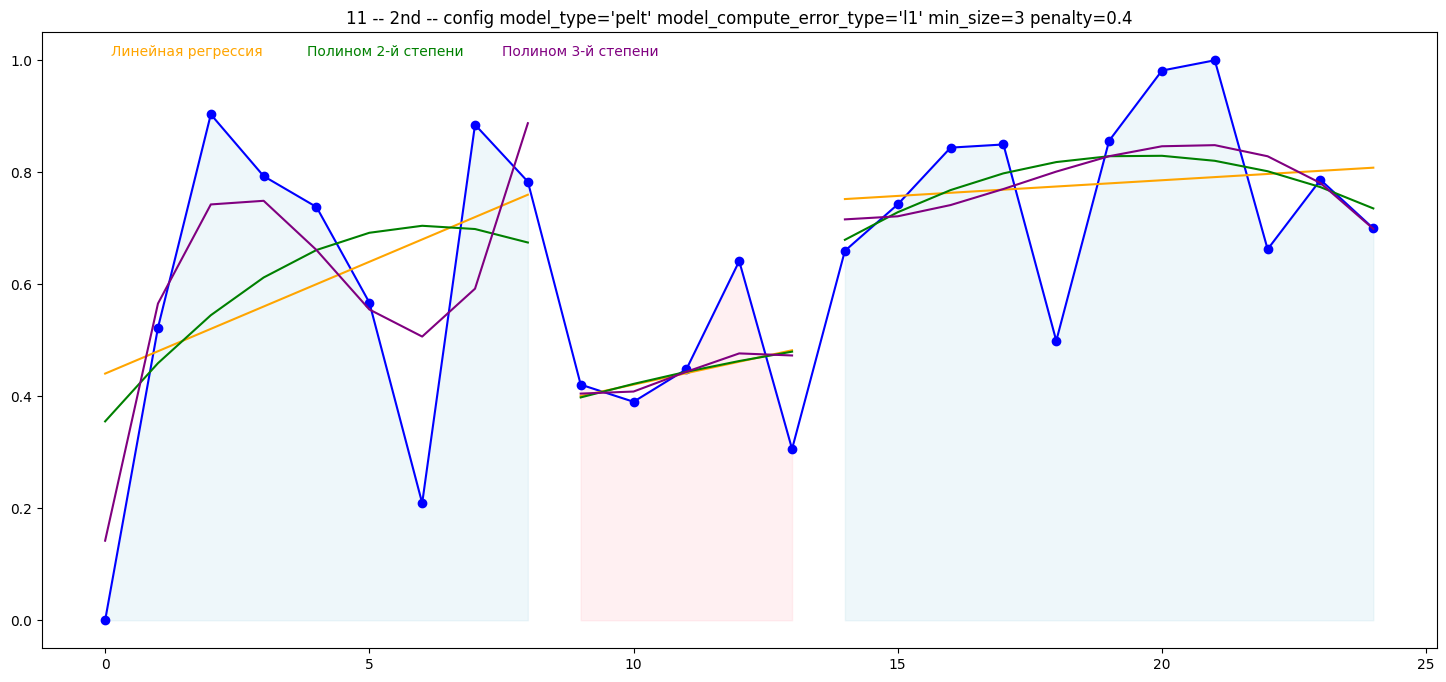

------------------------------


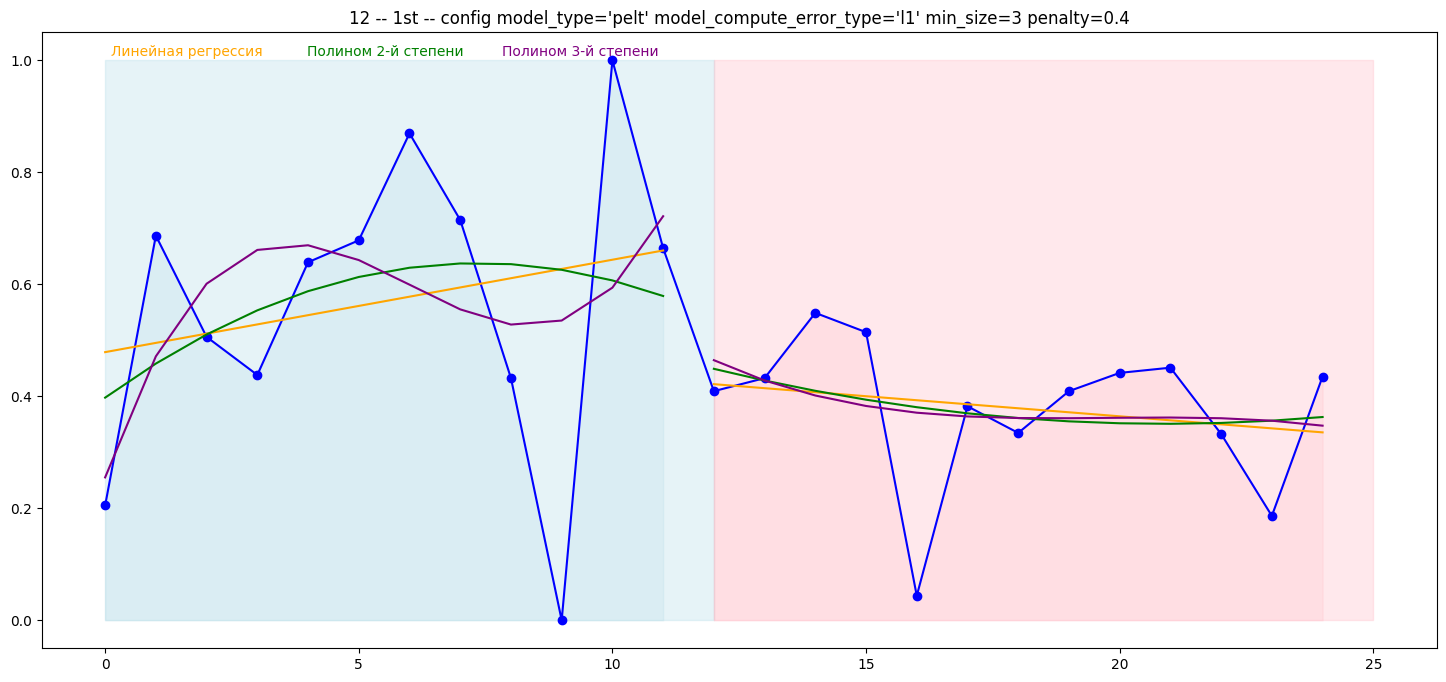

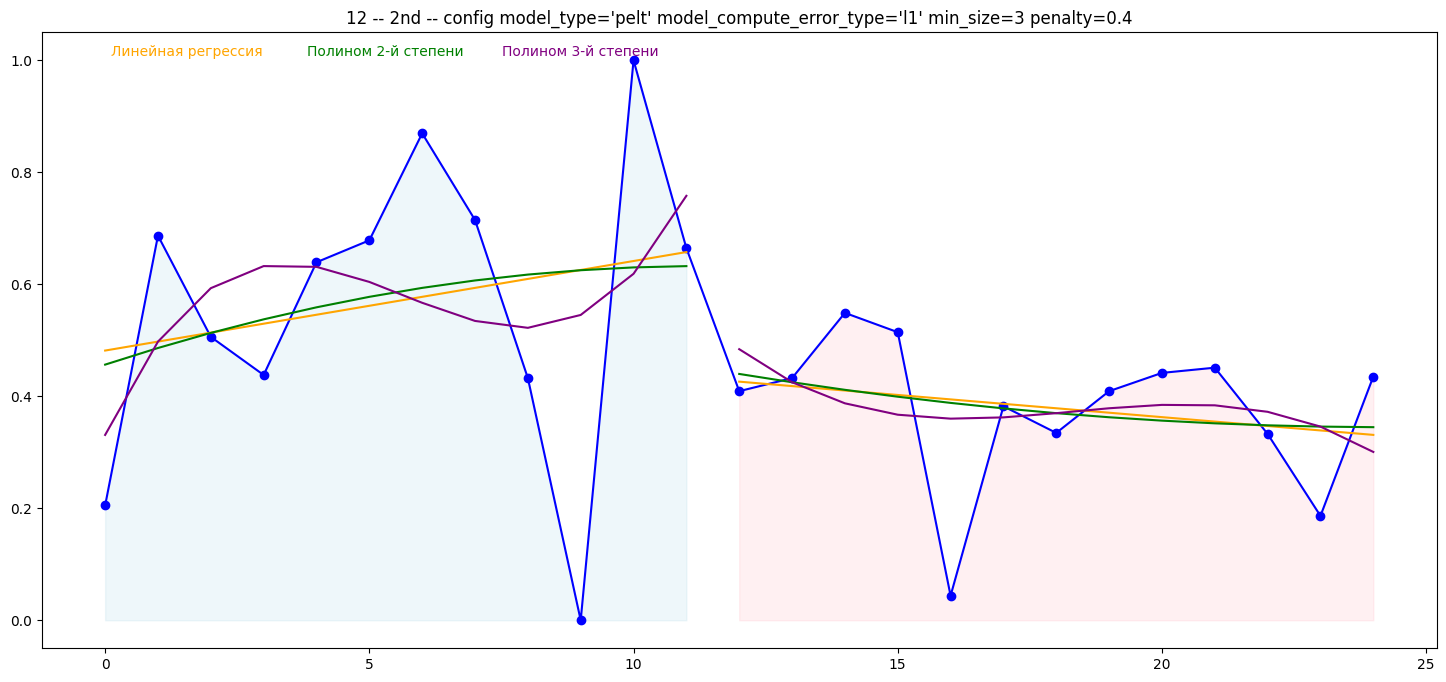

------------------------------


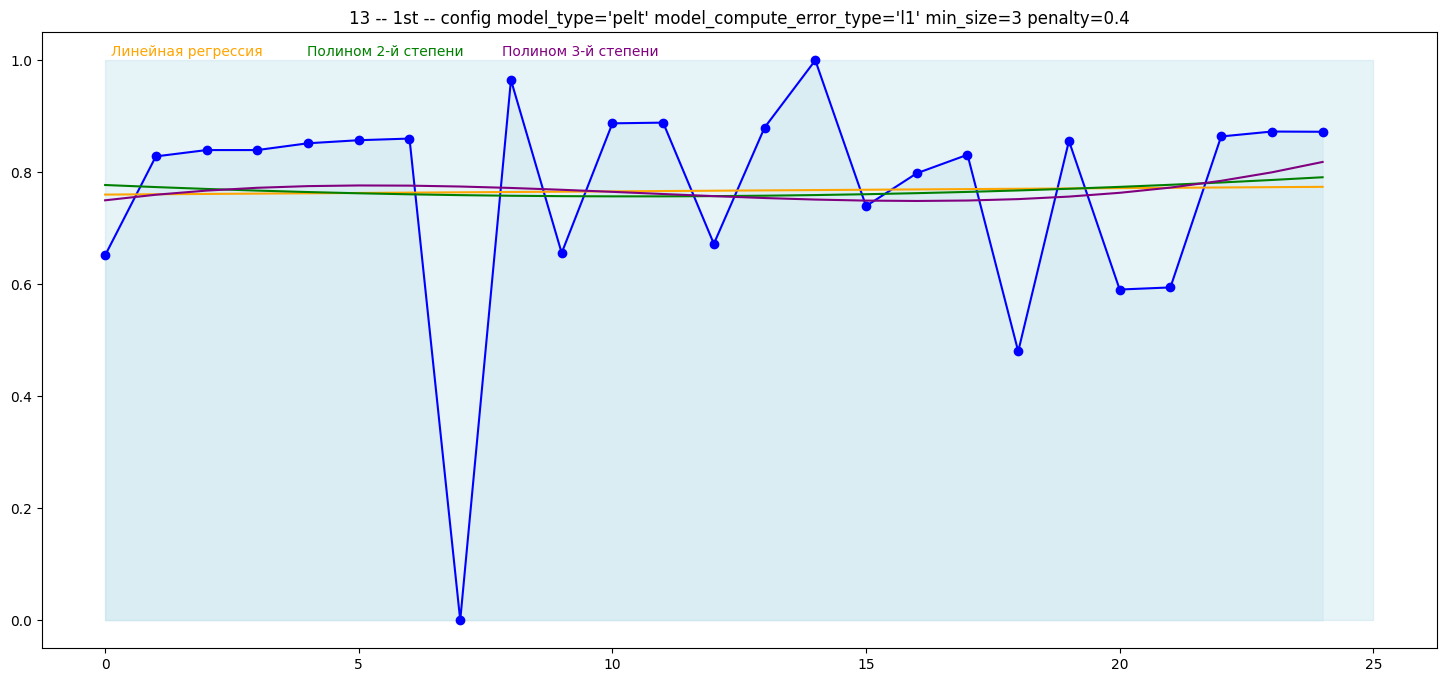

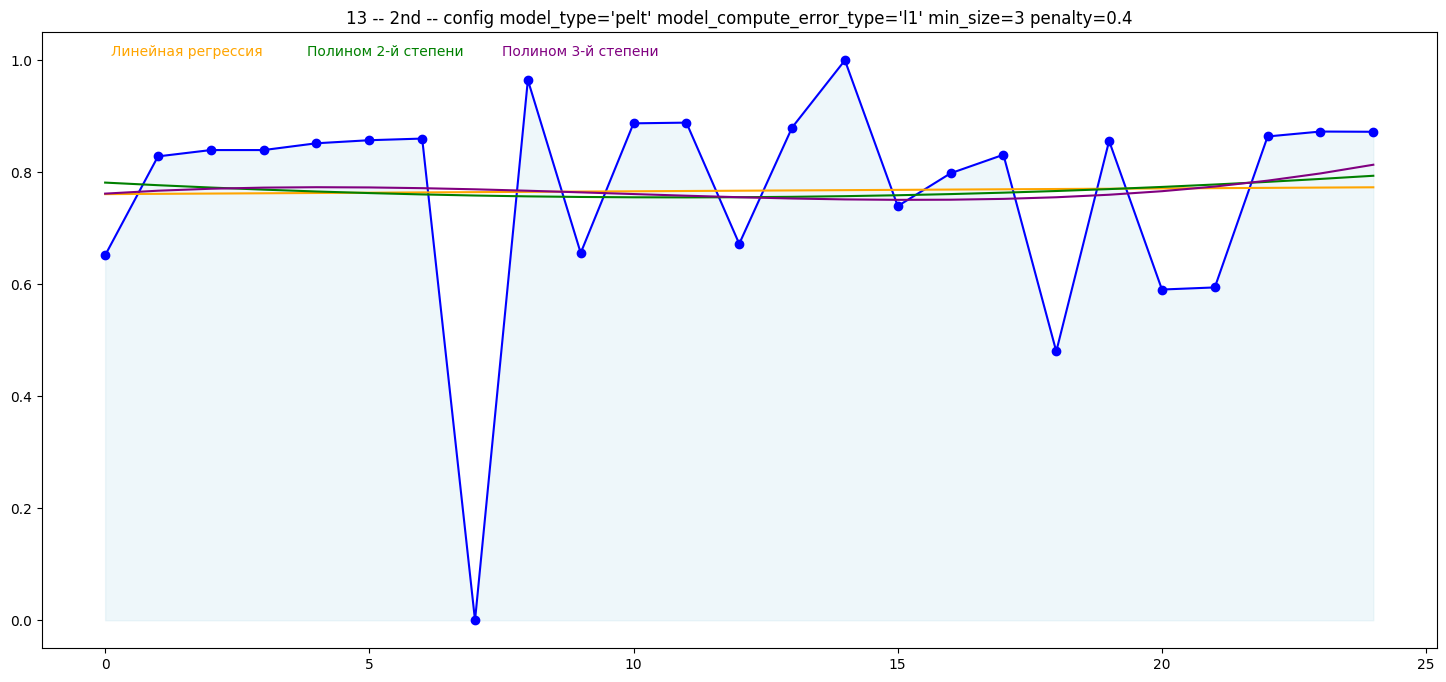

------------------------------


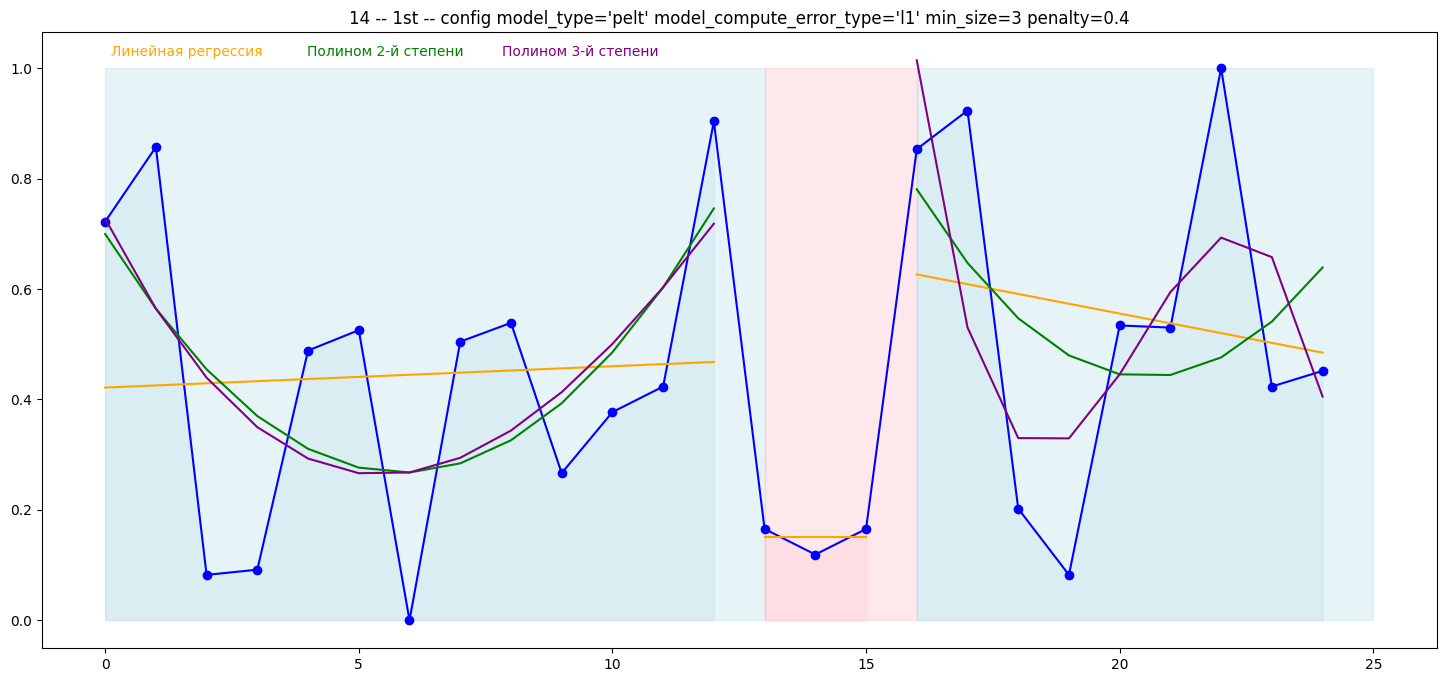

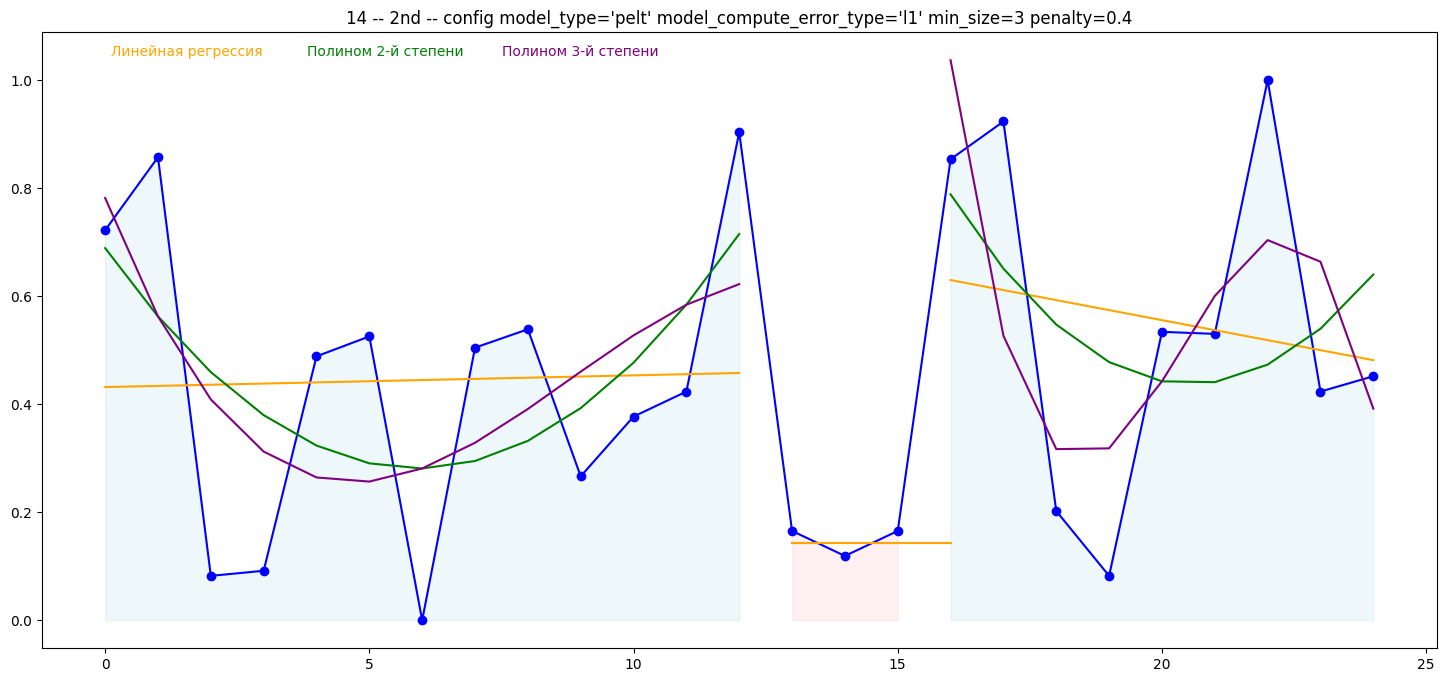

------------------------------


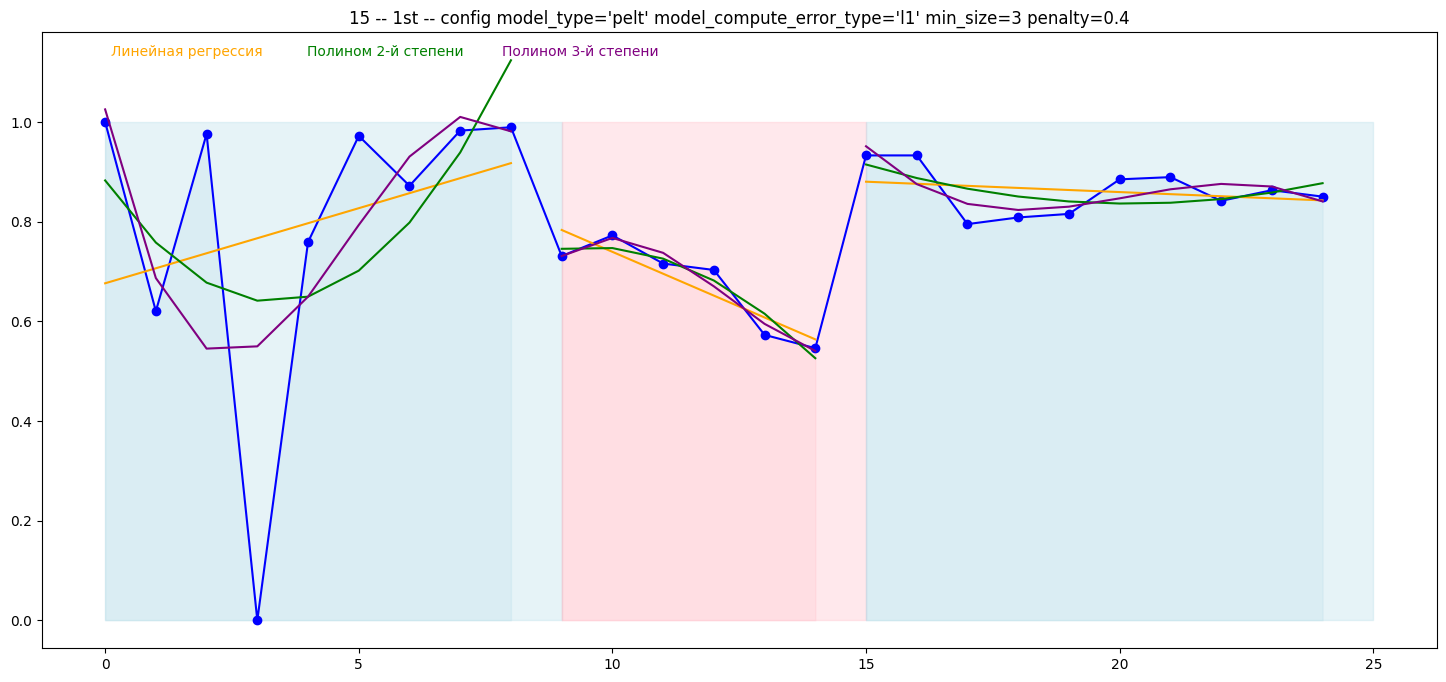

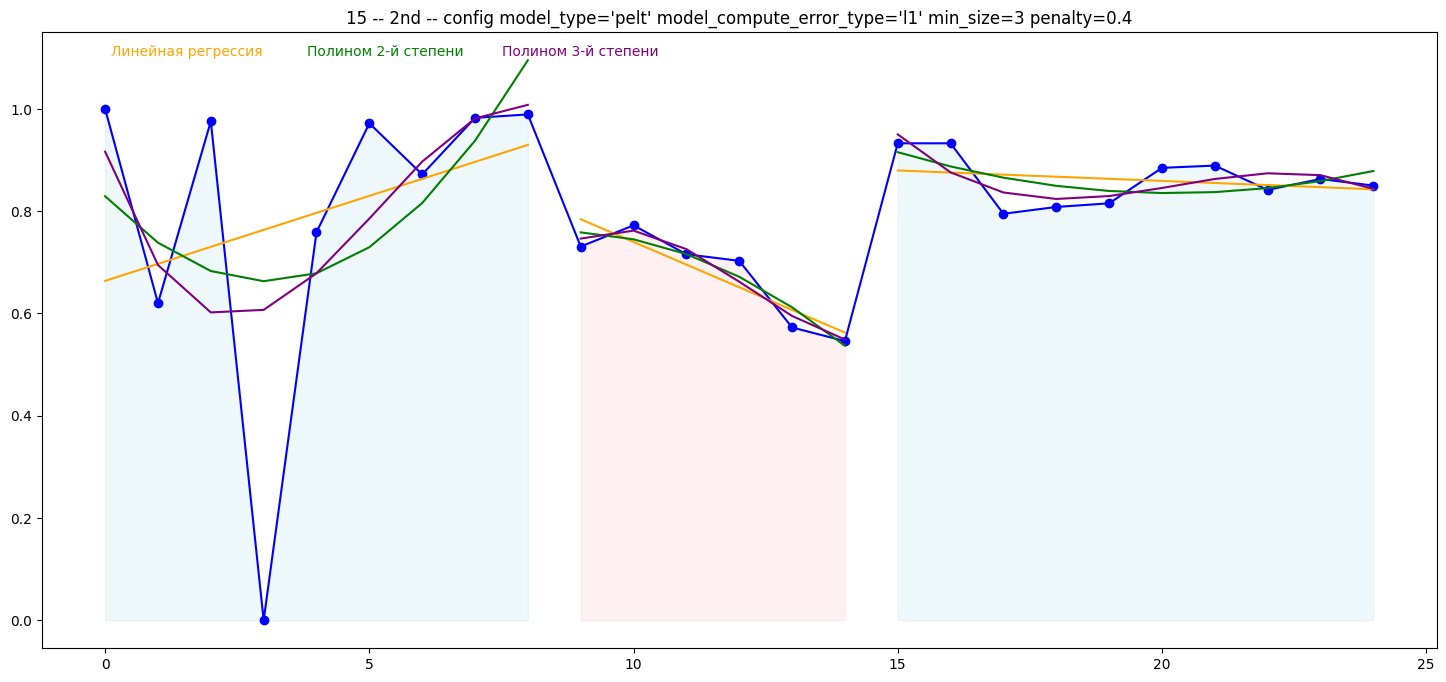

------------------------------


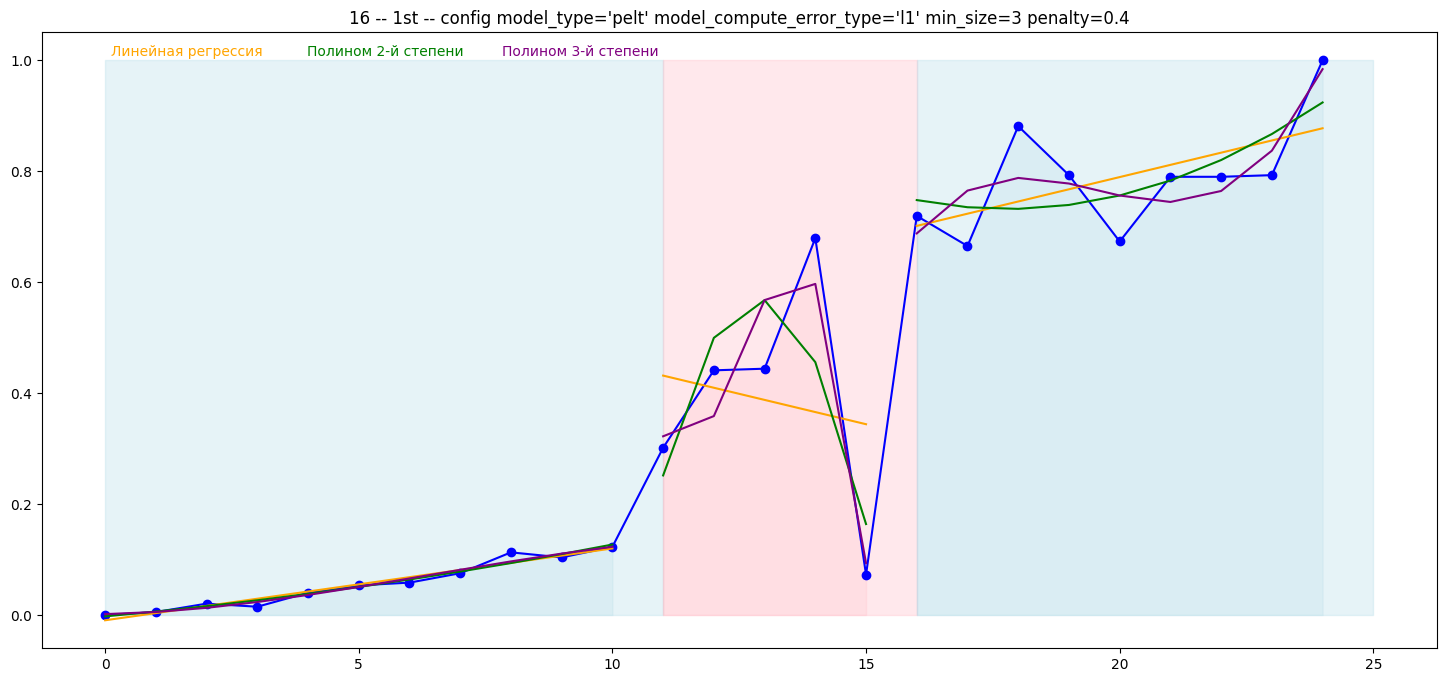

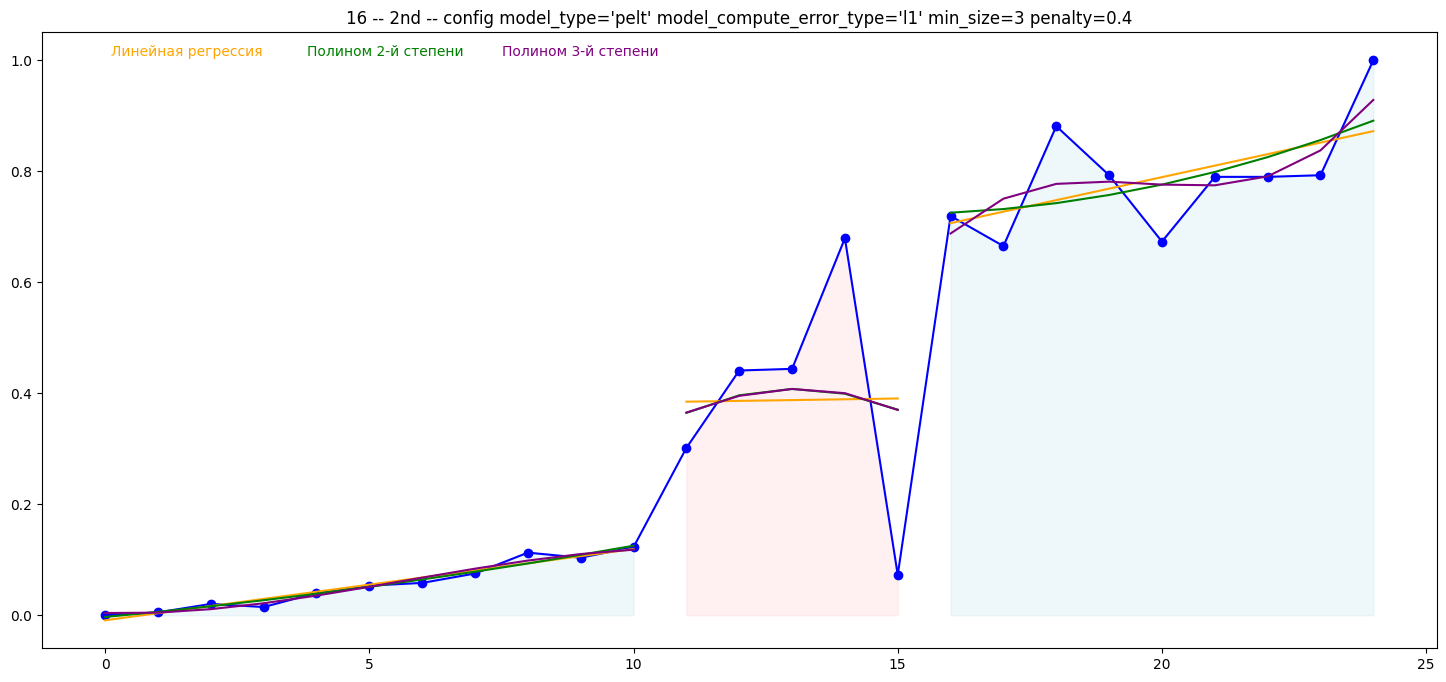

------------------------------


KeyboardInterrupt: 

In [15]:
amount_of_plots = 20


config_first_model = {
    "model_type": "pelt",
    "model_compute_error_type": "l1",
    "min_size": 3,
    "penalty": 0.4
}

config_second_model = {
    "model_type": "pelt",
    "model_compute_error_type": "l1",
    "min_size": 3,
    "penalty": 0.4
}

config_first_model: Config = Config(**config_first_model)
config_second_model: Config = Config(**config_second_model)


for i in range(amount_of_plots):
    norm_prices = np.array([df.at[i, f'norm_price_{j + 1}'] for j in range(25)])
    buy_sell_labels = [df.at[i, f'sep_point_{j + 1}'] for j in range(25)]

    segment_with_regressions(i, norm_prices, config_first_model)
    segment_timeseries_with_regressions_started_and_ended_from_mean_of_two(i, norm_prices, config_second_model)

    print("---" * 10)
